# What sells a car?

You're an analyst at Crankshaft List. Hundreds of free advertisements for vehicles are published on your site every day. You need to study data collected over the last few years and determine which factors influence the price of a vehicle.

The main facrors affecting the price on the automarket are condition of the vehicle, milage, date of manufacturing, color of the vehicle, does the car have the warranty/extended warranty and has it or not been serviced under the warranty by its dealer, wether the car was in accidents, how many owners does it had in past and who they were: individuals or legal entities. In some periods of time some additional factors might prevail - for example, during high fuel prices periods customers prefer vehicles with less engine volumes (number of cylinders) and vice versa.

Pre-owned vehicles refer to used vehicles. In other words, a pre-owned car had at least one owner in the past. Its price can vary greatly depending on its make, model, year, and condition. The condition of a pre-owned car is one of the main considerations for used car buyers. Compared to a poorly cared-for vehicle, a properly maintained vehicle is more likely to operate well for a longer time with fewer problems and repairs, making it a more worthwhile investment. Depending on its age, a pre-owned car may or may not be under warranty and/or extended warranty.

All of this factors mights have different affect on car price and we are going to search for any possible correletaions between this factors and the price of the vehicles on the market.

## Initialization

In [1]:
# Loading the libraries for calculations and visualization

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Load data

First of all we load the data and observe the general information about data (size, data types, missing values, etc.)

In [2]:
# Loading the data file into a DataFrame

data = pd.read_csv('/datasets/vehicles_us.csv')

### Explore initial data

The dataset contains the following fields:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, diesel, etc.
- `odometer` — the vehicle's mileage when the ad was published
- `transmission`
- `paint_color`
- `is_4wd` — whether the vehicle has 4-wheel drive (Boolean type)
- `date_posted` — the date the ad was published
- `days_listed` — from publication to removal

In [3]:
# printing the general/summary information about the DataFrame

print(data.info())
print()
print(data.describe())
print()
display(data.loc[45694])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB
None

               price    model_year     cylinders       odometer   is_4wd  \
count   51525.000000  47906.000000  46265.000000   43633.000000  25572.0   
mean    12132.464920   200

price                18000
model_year          1929.0
model           ford f-150
condition             good
cylinders              8.0
fuel                   gas
odometer               NaN
transmission        manual
type                 other
paint_color         silver
is_4wd                 NaN
date_posted     2018-11-18
days_listed             59
Name: 45694, dtype: object

In [4]:
# printing a sample of data
data.head(30)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


The dataset consits of 51525 rows and 13 columns. Number of non-null entries is less then 51525 in 5 columns (`model_year`, `cylinders`, `odometer`, `paint_color` and `is_4wd`) which means that we have missing values in the dataset. We have one additional column wich was not present in Data description - the `type` column. We can assume that this is a vehicle body type.  

Column names' syntaxis is fine, just one name (`paint_color`) may be simplified for more convinient use. Data types of some columns should be changed: `model_year`, `cylinders` and `odometer` from float to integer. There may be needed more data type changes (should be cheked later). The `is_4wd` column seems to contain only 1.0 and NAN values. `Odometer` column contains 0 values that should be cheked for different `condition` categories. Other columns seems to contain realistic data and have correct data types up to the moment.

In [5]:
# Renaming paint_color column
data = data.rename(columns = {'paint_color' : 'color'})

# Checking that everuthing was correct
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   color         42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB
None


Now we can take a closer look at the missing data.

In [6]:
# Checking for missing values in the dataset
print(data.isna().sum())

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
color            9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64


Five columns in the dataset contain different number of missing values: from 3619 (`model_year`) up to 25953 (`is_4wd`). The biggest value equals to about 50% of the whole dataset for `is_4wd`. Minimum three of them (`model_year`, `odometer` and `is_4wd`) may be the values of major interest in our project. We have to check if there any patterns in missing values regarding particular `model`, `type`, `model_year`, etc.

Although `model` column has no missing values we have to check if the spelling of the values is correct to evoid possible duplications.

In [7]:
# Checking for unique values in model column

models = data['model'].unique()
models.sort()
print(f'There are totaly {len(models)} unique models in the dataset')
print()
print(models)

There are totaly 100 unique models in the dataset

['acura tl' 'bmw x5' 'buick enclave' 'cadillac escalade'
 'chevrolet camaro' 'chevrolet camaro lt coupe 2d' 'chevrolet colorado'
 'chevrolet corvette' 'chevrolet cruze' 'chevrolet equinox'
 'chevrolet impala' 'chevrolet malibu' 'chevrolet silverado'
 'chevrolet silverado 1500' 'chevrolet silverado 1500 crew'
 'chevrolet silverado 2500hd' 'chevrolet silverado 3500hd'
 'chevrolet suburban' 'chevrolet tahoe' 'chevrolet trailblazer'
 'chevrolet traverse' 'chrysler 200' 'chrysler 300'
 'chrysler town & country' 'dodge charger' 'dodge dakota'
 'dodge grand caravan' 'ford econoline' 'ford edge' 'ford escape'
 'ford expedition' 'ford explorer' 'ford f-150' 'ford f-250'
 'ford f-250 sd' 'ford f-250 super duty' 'ford f-350 sd' 'ford f150'
 'ford f150 supercrew cab xlt' 'ford f250' 'ford f250 super duty'
 'ford f350' 'ford f350 super duty' 'ford focus' 'ford focus se'
 'ford fusion' 'ford fusion se' 'ford mustang' 'ford mustang gt coupe 2d'
 'for

In [8]:
# Checking the amount of ford f-150/250/350 models in the dataset

ford_f_list = ['ford f-150', 'ford f-250', 'ford f-250 sd', 'ford f-250 super duty', 'ford f-350 sd', 'ford f150',
 'ford f150 supercrew cab xlt', 'ford f250', 'ford f250 super duty', 'ford f350', 'ford f350 super duty']
ford_f_len = len(data.query('model in @ford_f_list'))
print(f'Percantage of "ford f" models in the dataset: {ford_f_len/len(data):.2%}')

Percantage of "ford f" models in the dataset: 12.11%


We have 100 different models in the collumn. All of them are spelled correctly with only lower case letters. There are some issues with Ford vehicles (12.11% of all models): ford f-150 models has 'ford f-150' and 'ford f150' spelling. The same issue refers to Ford f-250 model. Since these models are very popular on the market the spelling should be standardized. 

In [9]:
# Replacing different spelling with standard one

data['model'] = data['model'].str.replace('f150', 'f-150')
data['model'] = data['model'].str.replace('f250', 'f-250')
data['model'] = data['model'].str.replace('f350', 'f-350')
models = data['model'].unique()
models.sort()
print(f'There are totaly {len(models)} unique models in the dataset')
print()
print(models)

# Creating list of models for future analisys

models_list = models.tolist()

There are totaly 97 unique models in the dataset

['acura tl' 'bmw x5' 'buick enclave' 'cadillac escalade'
 'chevrolet camaro' 'chevrolet camaro lt coupe 2d' 'chevrolet colorado'
 'chevrolet corvette' 'chevrolet cruze' 'chevrolet equinox'
 'chevrolet impala' 'chevrolet malibu' 'chevrolet silverado'
 'chevrolet silverado 1500' 'chevrolet silverado 1500 crew'
 'chevrolet silverado 2500hd' 'chevrolet silverado 3500hd'
 'chevrolet suburban' 'chevrolet tahoe' 'chevrolet trailblazer'
 'chevrolet traverse' 'chrysler 200' 'chrysler 300'
 'chrysler town & country' 'dodge charger' 'dodge dakota'
 'dodge grand caravan' 'ford econoline' 'ford edge' 'ford escape'
 'ford expedition' 'ford explorer' 'ford f-150'
 'ford f-150 supercrew cab xlt' 'ford f-250' 'ford f-250 sd'
 'ford f-250 super duty' 'ford f-350' 'ford f-350 sd'
 'ford f-350 super duty' 'ford focus' 'ford focus se' 'ford fusion'
 'ford fusion se' 'ford mustang' 'ford mustang gt coupe 2d' 'ford ranger'
 'ford taurus' 'gmc acadia' 'gmc sie

Now we have 97 unique models in tha dataset since all Ford models have standardized spelling. 

Also we need to check the correct spelling in other categorical columns: `color`, `type` and `condition`.

In [10]:
# Checking for unique values in condition, paint_color 

print(f'Unique values for condition column: {data["condition"].unique()}')
print()
print(f'Unique values for color column: {data["color"].unique()}')
print()
print(f'Unique values for type column: {data["type"].unique()}')
print()
print(f'Unique values for transmission column: {data["transmission"].unique()}')

Unique values for condition column: ['good' 'like new' 'fair' 'excellent' 'salvage' 'new']

Unique values for color column: [nan 'white' 'red' 'black' 'blue' 'grey' 'silver' 'custom' 'orange'
 'yellow' 'brown' 'green' 'purple']

Unique values for type column: ['SUV' 'pickup' 'sedan' 'truck' 'coupe' 'van' 'convertible' 'hatchback'
 'wagon' 'mini-van' 'other' 'offroad' 'bus']

Unique values for transmission column: ['automatic' 'manual' 'other']


Fortunately all this 4 columns have correct value spelling and no missing values.

### Conclusions and further steps

We have pretty big dataset of 51525 rows for 97 models, which contains relatively big amount of missing values up to 18% in `color` column (we may assume for now that `is_4wd` values are not missing, but equals fot 0 for non all-wheels drive transmissions, we will check this assumption later on). We do not have any information regarding 3 important price factors - accidents, warranty/warranty service and previous owners. We also do not have vehicle ids and do not have the possibility to define the returning ads.  
  
In order to proceed we need to explore all categorical values (columns like `type`, `cylinders`, `condition`, `color`, `'transmission`) for correct correspondance with other values and missing values, check the assumption that 0 values in `is_4wd` equals to non AWD vehicles, check distribution of missing values in column with numeric values (`'model_year` and `odometer`) and decide what to do with missing values, whether deop the off or fill with proper values for each column. 

## Treating missing values

### Price column

First colгmn is the `price` one. It has no missing values but has some extremely low values which seem to be impossible.

In [11]:
# Checking for unique numbers

price_unique = data['price'].unique()
price_unique.sort()
print(price_unique)

# Checking for impossible numbers

print(f'Amount of vechicles with price less or equal to 10: {len(data.query("price <= 10"))}')
print(f'Amount of vechicles with price less or equal to 100: {len(data.query("price <= 100"))}')   
print()
display(data.query('price <= 10'))

[     1      3      5 ... 189000 300000 375000]
Amount of vechicles with price less or equal to 10: 803
Amount of vechicles with price less or equal to 100: 863



,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,color,is_4wd,date_posted,days_listed
405,1,2014.0,chevrolet camaro,excellent,6.0,gas,71310.0,automatic,coupe,NaN,NaN,2018-07-14,29
3063,1,1998.0,chevrolet silverado,good,8.0,gas,164000.0,automatic,pickup,NaN,1.0,2018-10-11,49
3808,1,2007.0,chevrolet tahoe,good,8.0,gas,200.0,automatic,SUV,red,NaN,2019-03-18,63
3902,1,1996.0,ford f-150,fair,NaN,gas,163000.0,manual,truck,white,NaN,2019-02-23,54
4140,1,2004.0,chevrolet silverado,excellent,8.0,diesel,83000.0,automatic,pickup,NaN,1.0,2019-02-04,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50245,1,1986.0,chevrolet silverado,good,8.0,gas,NaN,automatic,truck,red,1.0,2018-11-30,50
50393,1,2003.0,gmc sierra 2500hd,good,8.0,diesel,212300.0,automatic,pickup,black,1.0,2019-04-12,28
50430,5,2011.0,toyota sienna,good,6.0,gas,NaN,automatic,SUV,green,NaN,2018-12-03,5
50971,10,2012.0,toyota prius,excellent,4.0,hybrid,101000.0,automatic,hatchback,green,NaN,2019-03-16,29


There were found 863 vehicles of different age and condition categories with the price equals or less then 10. It seems to bу impossible numbers and they might be rejected as outliners later on. 

### Model_year column

First column with missing values is `model_year`. 

In [12]:
# Checking for unique values

years= data['model_year'].unique()
years.sort()
print(years)
print()

# Checking for years distribution in the whole dataset

print(data['model_year'].value_counts().tail(15))

print(f'Amount of entries with NAN both in model_year and odometer: '
      f'{len(data.query("model_year.isna() and odometer.isna()"))}')

[1908. 1929. 1936. 1948. 1949. 1954. 1955. 1958. 1960. 1961. 1962. 1963.
 1964. 1965. 1966. 1967. 1968. 1969. 1970. 1971. 1972. 1973. 1974. 1975.
 1976. 1977. 1978. 1979. 1980. 1981. 1982. 1983. 1984. 1985. 1986. 1987.
 1988. 1989. 1990. 1991. 1992. 1993. 1994. 1995. 1996. 1997. 1998. 1999.
 2000. 2001. 2002. 2003. 2004. 2005. 2006. 2007. 2008. 2009. 2010. 2011.
 2012. 2013. 2014. 2015. 2016. 2017. 2018. 2019.   nan]

1972.0    5
1974.0    4
1960.0    3
1963.0    3
1976.0    3
1962.0    3
1908.0    2
1958.0    2
1954.0    1
1929.0    1
1948.0    1
1961.0    1
1936.0    1
1949.0    1
1955.0    1
Name: model_year, dtype: int64
Amount of entries with NAN both in model_year and odometer: 549


The years' list consists of continious values since 1960, some `model_year` values before 1960 are missing, but we cannot assume reasonably which ones might be missed, because cars before 1960 a very rare in this dataset. This may happen when sellers forget to put the `model_year` value in the database or may be they did not know it exactly. The were found 549 entries which contains missing values in both `model_year` and `odometer`.   

In [13]:
# Checking distribution in the filtered dataset

data_nan = data[data['model_year'].isna()]
print()
data_nan.info()
print()
display(data_nan.head(20))
print()
print(f'Amount of models with missing values: {len(data_nan["model"].unique())}')
print(f'Amount of types with missing values: {len(data_nan["type"].unique())}')
print(f'Types with missing values: {data_nan["type"].unique()}')
print(f'Unique values for type column: {data["type"].unique()}')
print(f'Number of bus entries: ', {len(data.query('type == "bus"'))})


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3619 entries, 1 to 51508
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         3619 non-null   int64  
 1   model_year    0 non-null      float64
 2   model         3619 non-null   object 
 3   condition     3619 non-null   object 
 4   cylinders     3256 non-null   float64
 5   fuel          3619 non-null   object 
 6   odometer      3070 non-null   float64
 7   transmission  3619 non-null   object 
 8   type          3619 non-null   object 
 9   color         2967 non-null   object 
 10  is_4wd        1808 non-null   float64
 11  date_posted   3619 non-null   object 
 12  days_listed   3619 non-null   int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 395.8+ KB



,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,color,is_4wd,date_posted,days_listed
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
20,6990,NaN,chevrolet tahoe,excellent,8.0,gas,147485.0,automatic,SUV,silver,1.0,2018-08-05,28
65,12800,NaN,ford f-150,excellent,6.0,gas,108500.0,automatic,pickup,white,NaN,2018-09-23,15
69,7800,NaN,ford f-150,like new,8.0,gas,97510.0,automatic,truck,white,1.0,2019-02-20,39
72,3650,NaN,subaru impreza,excellent,NaN,gas,74000.0,automatic,sedan,blue,1.0,2018-08-07,60
84,4995,NaN,hyundai elantra,like new,4.0,gas,151223.0,automatic,sedan,custom,NaN,2018-09-15,1
102,10800,NaN,chevrolet colorado,excellent,5.0,gas,114922.0,automatic,truck,red,1.0,2018-06-23,35
114,23700,NaN,nissan frontier crew cab sv,good,6.0,gas,12901.0,other,pickup,black,1.0,2018-09-21,8
116,25300,NaN,chevrolet camaro lt coupe 2d,good,6.0,gas,3568.0,other,coupe,NaN,NaN,2018-06-16,34
144,8995,NaN,chevrolet silverado 1500,excellent,8.0,gas,119726.0,automatic,truck,grey,1.0,2019-03-18,27



Amount of models with missing values: 97
Amount of types with missing values: 12
Types with missing values: ['pickup' 'SUV' 'truck' 'sedan' 'coupe' 'wagon' 'hatchback' 'other'
 'mini-van' 'convertible' 'van' 'offroad']
Unique values for type column: ['SUV' 'pickup' 'sedan' 'truck' 'coupe' 'van' 'convertible' 'hatchback'
 'wagon' 'mini-van' 'other' 'offroad' 'bus']
Number of bus entries:  {24}


Missing values are distributed evenly among the whole dataset for all 97 models and 12 types (except "bus" with 24 entries across the whole dataset)

In this case we can fill missing values for `model_year` with the most common year for each `model` in our dataset. 

In [14]:
# Creating the dictionary for model and most common model_year

model_year_dict = data.groupby('model')['model_year'].apply(lambda x: x.value_counts().idxmax()).to_dict()

# Replacing missing values in model_year column

data['model_year'] = data['model_year'].fillna(data.model.map(model_year_dict))

# Cheking that everything was applied correctly

print(data.info())
print(data['model_year'].describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   color         42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB
None
count    51525.000000
mean      2009.872314
std          6.144889
min       1908.000000
25%       2007.000000
50%       2011.000000
75%       2014.000000
max       2019.000000
Nam

The `model_year` missing values are fixed and we can move on to `condition`. 

###  Condition column

As far as the `condition` we can assume that this data by its origin has a clear ordered structure from "new" condition of the new car to "salvage" condition of the car with huge milage or after the accident, which all affect directly the car price. That's why we can encode them in the descending order of consumer properties: 5 for "new', 4 for "like new", 3 for "excellent", 2 for "good", 1 for "fair" and 0 for "salvage".

In [15]:
# Replacing the condition values with corresponding indices

# Creating condition dictionary

condition_dict = {'new':5, 'like new':4, 'excellent':3, 'good':2, 'fair':1, 'salvage':0}

# Replacing values from the dictionary

data['condition'] = data.condition.map(condition_dict)

# Cheking that everything was replaced properly

print(data.info())
print()
print(data['condition'].describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  int64  
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   color         42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(3), object(6)
memory usage: 5.1+ MB
None

count    51525.000000
mean         2.637535
std          0.712447
min          0.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          5.000000
Na

All text data in `condition` were replaces with numeric one. 

The are some ideas regarding cars in "new" condition. The ideal situation is a 0 milage on the odometer for a new car. But it almost never happens, as long as the vechiles have to move around the plant to the the loading point, some of them, delivered by sea have to move around the port and, moreovere, the vechicles with extra equipment installed also need to move between different zones of the plant. The most common reasonable milage equals to 100 miles for the new car at the dealer. We need to check to what type of car and what model_year these 0 `odometer` vehicles belong.

Number of entries with 0 in odometer column:  185
Number of new cars:  143
Number of new cars with 100 or less value in odometer column:  42
Number of new cars with more then 100 in odometer column:  83
0.007180980106744299
count       125.000000
mean      43476.056000
std       67269.684251
min           5.000000
25%          21.000000
50%        8002.000000
75%       69000.000000
max      315000.000000
Name: odometer, dtype: float64


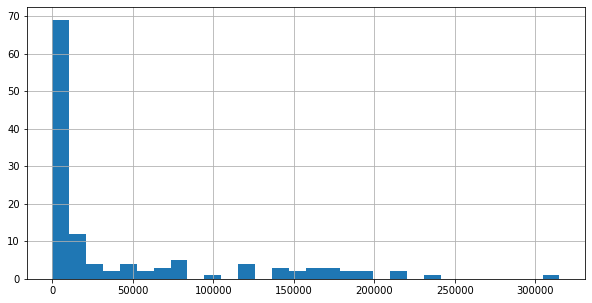

In [16]:
# Checking for the condition type for 0 values in ododmeter column

#print(data['odometer'].describe())
print(f'Number of entries with 0 in odometer column: ', len(data.query('odometer == 0')))
print(f'Number of new cars: ', len(data.query('condition == 5')))

print(f'Number of new cars with 100 or less value in odometer column: ', 
      len(data.query('odometer <= 100 and condition == 5')))
print(f'Number of new cars with more then 100 in odometer column: ', 
      len(data.query('odometer > 100 and condition == 5')))

percentage_ododmeter = len(data.query('odometer < 100 ')) / len(data)
print(percentage_ododmeter)

data.query('condition == 5')['odometer'].hist(bins=30, figsize=(10, 5))
print(data.query('condition == 5')['odometer'].describe())

So we got 143 "new" cars in total and only 42 of them have `odometer` value of 100 or less. We even have "new" car with 315000 `odometer` value(!). This means that either something is wrong with the data in `condition` column or the customers prefer to put this "new" type in marketing purposes. In both cases we can assume that this data should be excluded from the analysys of this category as impossible data or the `condition` should be changed to lower one.

### Cylinders column

Let's check unique values and distribution of missing values in `cylinders`.

In [17]:
# Checking distribution of missing values in cylinder column

no_cylinders = data[data['cylinders'].isna()]
print(f'Unique values in cylinders column: {data["cylinders"].unique()}')
print()
print(f'Amount of models with missid values in cylinders column: '
      f'{len(data.query("cylinders.isna()")["model"].unique())}')
print()
print(no_cylinders.head(10))

Unique values in cylinders column: [ 6.  4.  8. nan  5. 10.  3. 12.]

Amount of models with missid values in cylinders column: 97

     price  model_year                          model  condition  cylinders  \
9     9200      2008.0                    honda pilot          3        NaN   
36   10499      2013.0                   chrysler 300          2        NaN   
37    7500      2005.0                  toyota tacoma          2        NaN   
59    5200      2006.0              toyota highlander          2        NaN   
63   30000      1966.0                   ford mustang          3        NaN   
72    3650      2008.0                 subaru impreza          3        NaN   
75    6950      2005.0                chevrolet tahoe          3        NaN   
87    8499      2009.0                         bmw x5          2        NaN   
119  14800      2016.0                    kia sorento          4        NaN   
126  25900      2012.0  chevrolet silverado 1500 crew          2        NaN   


One can see that missing values are among all 97 models across the dataset. The are two very unusual values: 3 and 5 cylinders. 3/5-cylinder engines were used by manufacturers for specific models, preferably for sport cars. 

In [18]:
# print(len(data[data['cylinders'].isna()]['model'].value_counts()))

print(data[data['cylinders'].isna()]['model'].value_counts())
print()
print(data[data['cylinders'].isna()]['type'].value_counts())

ford f-150                           355
chevrolet silverado 1500             231
ram 1500                             185
chevrolet silverado                  137
ram 2500                             122
                                    ... 
ford f-350 super duty                 20
ford f-150 supercrew cab xlt          20
dodge dakota                          18
bmw x5                                16
mercedes-benz benze sprinter 2500      7
Name: model, Length: 97, dtype: int64

truck          1265
sedan          1256
SUV            1224
pickup          714
coupe           222
wagon           164
hatchback       130
mini-van        127
van              65
convertible      36
other            31
offroad          22
bus               4
Name: type, dtype: int64


Disrtibution of missing values among the models correspods to the distribution of the models in the dataset.

In [19]:
# Cheking for unusual values distribution in cylinders column

cylinders_3 = len(data.query("cylinders == 3"))
print(f'Number of entries with 3-cylinedrs engine: {cylinders_3}')
print(f'List of models with 3-cylinedrs engine: {data.query("cylinders == 3")["model"].unique()}')
print()
cylinders_5 = len(data.query("cylinders == 5"))
print(f'Number of entries with 5-cylinedrs engine: {cylinders_5}')
print(f'List of models with 5-cylinedrs engine: {data.query("cylinders == 5")["model"].unique()}')
print()
print(f'Percentage of odd cylinders entries in the dataset: {(cylinders_3+cylinders_5)/len(data):.2%}')
print()
print(data['model'].value_counts())
print()
#print(data.query('model == "ford f-150"')['cylinders'].value_counts())

Number of entries with 3-cylinedrs engine: 34
List of models with 3-cylinedrs engine: ['toyota prius' 'ford f-150' 'ford ranger' 'jeep wrangler' 'honda civic'
 'honda civic lx' 'chevrolet traverse' 'ford escape' 'ford focus se'
 'toyota highlander' 'ford fusion' 'ford focus' 'honda odyssey'
 'subaru outback' 'jeep cherokee' 'honda accord' 'dodge grand caravan'
 'toyota camry le']

Number of entries with 5-cylinedrs engine: 272
List of models with 5-cylinedrs engine: ['chevrolet colorado' 'volkswagen passat' 'volkswagen jetta'
 'chevrolet tahoe' 'hyundai elantra' 'ram 2500' 'hyundai sonata'
 'honda pilot' 'honda accord' 'ford f-150' 'subaru forester'
 'ford mustang' 'ford edge' 'subaru outback' 'toyota camry le'
 'ford expedition' 'gmc sierra' 'nissan murano' 'toyota tacoma'
 'toyota highlander']

Percentage of odd cylinders entries in the dataset: 0.59%

ford f-150                           3326
chevrolet silverado 1500             2171
ram 1500                             1750
chevrol

It seems that either people did not know exactly how many cylinders their vechicle had or simply made a mistake while filling the form (I did not find any notice of 3 and 5 cylinders engine options for ford f-150, which is the most popular model in the dataset). We have three possible options in order to simplify our analyses:  
1) to replace this 3 & 5 values with the most common engine types (re. cylinder numbers) for the respective model;  
2) to create the 'other' category for this odd values or  
3) to dropp off this entries since the amount of this odd entries is 0.59% of the whole dataset.  
  
I choose the second option (we will replace the values later on, after treating missing values).

Filling of the missing values in `cylinder`. For this purpose we will chose the most popular engine for each model since `cilynders` is a categorical value column. 

In [20]:
# Checking the most common cylinder type regarding model

cylinder_model = data.groupby(['model'])['cylinders'].value_counts()
print(cylinder_model)
print()

# Creating a dictionary with model
common_model_cylinders = data.groupby('model')['cylinders'].apply(lambda x: x.value_counts().idxmax()).to_dict()

# Applying function with new dictionary for the wholу raw
data['cylinders'] = data['cylinders'].fillna(data.model.map(common_model_cylinders))

# Checking that everything is correct
print(data.info())
print()
print(data.describe())

model              cylinders
acura tl           6.0          208
                   4.0            3
bmw x5             6.0          200
                   8.0           51
buick enclave      6.0          245
                               ... 
volkswagen jetta   5.0          123
                   6.0            4
volkswagen passat  4.0          243
                   5.0           43
                   6.0           30
Name: cylinders, Length: 297, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  int64  
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  

In [21]:
# Creating new column 'cylinders_unified' for entries with 'other' value for 3 and 5 cylinders' entries
data['cylinders_unified'] = data['cylinders'].replace([3, 5], 'other')

# Cheking that everything is correct
print(f'Unique values in cylinders column: {data["cylinders_unified"].unique()}')
print()
print(data.info())

Unique values in cylinders column: [6.0 4.0 8.0 'other' 10.0 12.0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              51525 non-null  int64  
 1   model_year         51525 non-null  float64
 2   model              51525 non-null  object 
 3   condition          51525 non-null  int64  
 4   cylinders          51525 non-null  float64
 5   fuel               51525 non-null  object 
 6   odometer           43633 non-null  float64
 7   transmission       51525 non-null  object 
 8   type               51525 non-null  object 
 9   color              42258 non-null  object 
 10  is_4wd             25572 non-null  float64
 11  date_posted        51525 non-null  object 
 12  days_listed        51525 non-null  int64  
 13  cylinders_unified  51525 non-null  object 
dtypes: float64(4), int64(3), object(7)
memory usage: 5

We finally fix all missing values with `cyliders` and made new column `cylinders_unified` for entкies with uncommon engine types.

### Odometer column

Replacing missing values in `odometer` column.

count     43633.000000
mean     115553.461738
std       65094.611341
min           0.000000
25%       70000.000000
50%      113000.000000
75%      155000.000000
max      990000.000000
Name: odometer, dtype: float64

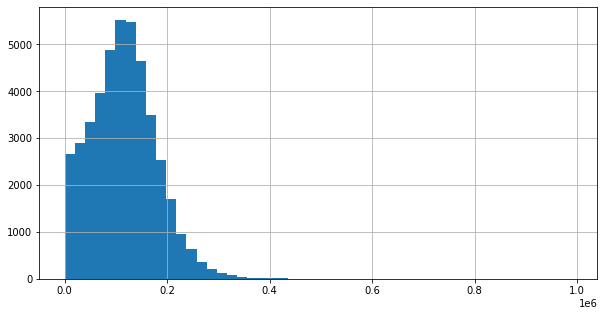

In [22]:
# Cheking distribution of odometer column values in the dataset

data['odometer'].hist(bins=50, figsize=(10, 5))
data['odometer'].describe()

The right-skewwed distribution of values in `odometer` shows us a number of extra big values, which means that we need to use median for filling of missing values.

In [23]:
# Cheking missing miles for all models from models_list 

def odometer_check(data):
    for i in models_list:
        if len(data.query('model == @i and odometer.isna()')) == len(data.query('model == @i')):
            print(f'For {i} all odometer data missed')
        
odometer_check(data)
print()

# Cheking all entries for mercedes model

print(f'Number of entries for Mercedes model: ', len(data.query('model == "mercedes-benz benze sprinter 2500"')))

For mercedes-benz benze sprinter 2500 all odometer data missed

Number of entries for Mercedes model:  41


As for the sole representative of Mercedes manufacturer we can assume that this is the same car, which was listed many times, because it has all the same data except `date_listed` and corresponding car age. But as far as we do not have ids for our vehicles we cannot prove this. On this step we will replace `odometer` value for "mercedes-benz benze sprinter 2500" with 0 value since we have nothing to compare with.

In [24]:
# Replacing missing values for Mercedes with 0

data.loc[data['model'] == 'mercedes-benz benze sprinter 2500', 'odometer'] = 0

# Checking if everything is correct

print(f'Amount of Mercedes models with 0 odometer: ', 
      len(data.query('model == "mercedes-benz benze sprinter 2500" and odometer == 0')))
print()
print(data.info())
print()
print(f'Remaining amount of 0 odometer models: ', len(data.query('odometer.isna()')))

Amount of Mercedes models with 0 odometer:  41

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              51525 non-null  int64  
 1   model_year         51525 non-null  float64
 2   model              51525 non-null  object 
 3   condition          51525 non-null  int64  
 4   cylinders          51525 non-null  float64
 5   fuel               51525 non-null  object 
 6   odometer           43674 non-null  float64
 7   transmission       51525 non-null  object 
 8   type               51525 non-null  object 
 9   color              42258 non-null  object 
 10  is_4wd             25572 non-null  float64
 11  date_posted        51525 non-null  object 
 12  days_listed        51525 non-null  int64  
 13  cylinders_unified  51525 non-null  object 
dtypes: float64(4), int64(3), object(7)
memory usage: 5.5+ MB
None

Remaini

Now we are redy to replace remaining missing values in `odometer` with the median value for `model` and `model_year`.

In [25]:
# Replacing by groupy and median

data['odometer'] = data['odometer'].fillna(data.groupby(
    ['model', 'model_year'])['odometer'].transform('median')
)

# Cheking that everything is correct

print(data.info())

# Cheking missing values 

print(data.query('odometer.isna()'))
print()
print(data.query('odometer.isna()')['model'].unique())
print()
print(f'Number of models with NAN without a corresponding medein for model_year: ', 
      len(data.query('odometer.isna()')))
print(data.query('model == "ford f-150" and model_year == 1975'))
print(data.query('model == "honda civic" and model_year == 1993'))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              51525 non-null  int64  
 1   model_year         51525 non-null  float64
 2   model              51525 non-null  object 
 3   condition          51525 non-null  int64  
 4   cylinders          51525 non-null  float64
 5   fuel               51525 non-null  object 
 6   odometer           51485 non-null  float64
 7   transmission       51525 non-null  object 
 8   type               51525 non-null  object 
 9   color              42258 non-null  object 
 10  is_4wd             25572 non-null  float64
 11  date_posted        51525 non-null  object 
 12  days_listed        51525 non-null  int64  
 13  cylinders_unified  51525 non-null  object 
dtypes: float64(4), int64(3), object(7)
memory usage: 5.5+ MB
None
       price  model_year                     model  cond

Replacing missing values for 40 models, which do not have median value to compare with - they either are the only model in the particular year in the dataframe or all such models in the dataframe have NAN values in the particular year. We will fill missing values with median `odometer` values for the corresponding `model_year` data.

In [26]:
data['odometer'] = data['odometer'].fillna(data.groupby(
    ['model_year'])['odometer'].transform('median')
)

print(data.info())
print()

# Cheking the remaining missing values


print(data.query('odometer.isna()'))
print()

# Replacing the only left odometer NAN value

data.loc[45694, 'odometer'] = 0
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              51525 non-null  int64  
 1   model_year         51525 non-null  float64
 2   model              51525 non-null  object 
 3   condition          51525 non-null  int64  
 4   cylinders          51525 non-null  float64
 5   fuel               51525 non-null  object 
 6   odometer           51524 non-null  float64
 7   transmission       51525 non-null  object 
 8   type               51525 non-null  object 
 9   color              42258 non-null  object 
 10  is_4wd             25572 non-null  float64
 11  date_posted        51525 non-null  object 
 12  days_listed        51525 non-null  int64  
 13  cylinders_unified  51525 non-null  object 
dtypes: float64(4), int64(3), object(7)
memory usage: 5.5+ MB
None

       price  model_year       model  condition  cylind

There was found the only model from 1929 year, which had nothing to compare at all. Its `odometer` value was replaced with 0 value on this stage since it will be highly likely rejected as outliner later on.  

We found 370 entries with 0 odometer value, but only 143 which had "new" condition. From the other side we found only 40 cars with "new" condition and odometer less, then 100. Although total values of this enties is very small to affect our statistics we will have to consider what to do with this circumstance as condition is one of the primary factors affecting the price. The maximum value of odometer values for "new" car equals = 315000(!). 

### Color column

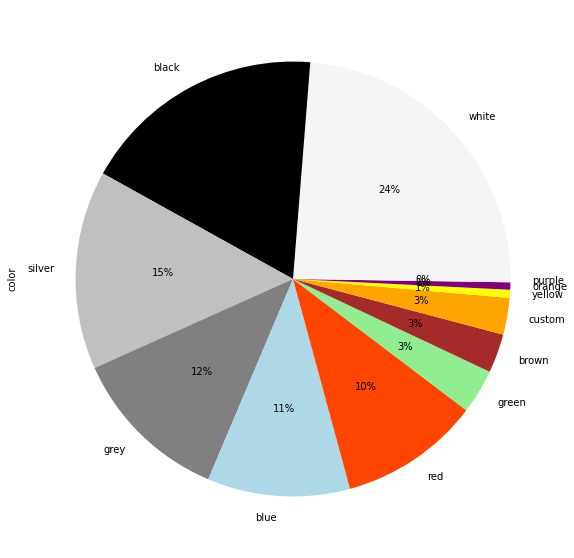

In [27]:
# Printing pie-chart with the percentage of every color in the dataset

my_colors = ['whitesmoke', 'black', 'silver', 'grey', 'lightblue', 
             'orangered', 'lightgreen', 'brown', 'orange', 'yellow', 'purple']

data['color'].value_counts().plot(
    kind='pie', 
    autopct='%1.0f%%', 
    figsize=(10, 10), 
    colors=my_colors
)
plt.show()

The distribution of colors looks realistic - white, black, silver, grey, red and blue colors are the most popular colors on the market.  
  
For replasing missing values in color column we will use 'other' color.

In [28]:
# Replacing missing values in color column

data['color'] = data['color'].fillna('other')

# Checking that everytjing is correct

print(data.info())
print()
print(data['color'].describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              51525 non-null  int64  
 1   model_year         51525 non-null  float64
 2   model              51525 non-null  object 
 3   condition          51525 non-null  int64  
 4   cylinders          51525 non-null  float64
 5   fuel               51525 non-null  object 
 6   odometer           51525 non-null  float64
 7   transmission       51525 non-null  object 
 8   type               51525 non-null  object 
 9   color              51525 non-null  object 
 10  is_4wd             25572 non-null  float64
 11  date_posted        51525 non-null  object 
 12  days_listed        51525 non-null  int64  
 13  cylinders_unified  51525 non-null  object 
dtypes: float64(4), int64(3), object(7)
memory usage: 5.5+ MB
None

count     51525
unique       13
top       white
freq   

All missing values in `color` column were succesfully replaced with the 'other' values.

### is_4wd column

In [29]:
# Cheking the distributin of missing values in the dataset

print(f'Amount of models with nan in is_4wd column :', 
      len(data.query('is_4wd.isna()')['model'].unique()))
print()
print(f'Amount of models with nan in type column :', 
      len(data.query('is_4wd.isna()')['type'].unique()))


Amount of models with nan in is_4wd column : 97

Amount of models with nan in type column : 13


Missing values in `is_4wd` column are distributed among all 97 models and 13 vehicle types. We can assume that 0 value correspondts to non AWD transmission in this column as majority of models are being manufactured both in AWD and non AWD transmission types.  
  
Filling missing values in `is_4wd`, assuming that NAN is equal to 0 (2wd vehicle).

In [30]:
# Filling missing values in is_4wd with 0 value.

data['is_4wd'] = data['is_4wd'].fillna(0)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              51525 non-null  int64  
 1   model_year         51525 non-null  float64
 2   model              51525 non-null  object 
 3   condition          51525 non-null  int64  
 4   cylinders          51525 non-null  float64
 5   fuel               51525 non-null  object 
 6   odometer           51525 non-null  float64
 7   transmission       51525 non-null  object 
 8   type               51525 non-null  object 
 9   color              51525 non-null  object 
 10  is_4wd             51525 non-null  float64
 11  date_posted        51525 non-null  object 
 12  days_listed        51525 non-null  int64  
 13  cylinders_unified  51525 non-null  object 
dtypes: float64(4), int64(3), object(7)
memory usage: 5.5+ MB
None


All missing values issues in our dataset are fixed.

### Cheking for duplicates

In [31]:
# Checking for duplicates in the whole dataset

print(f'Number of duplicated rows in the dataset -',  
      data.duplicated().sum())

Number of duplicated rows in the dataset - 0


We found no duplicates in our dataset (except for the Mercedes model we have found before).

## Fixing data types

Some text values in the original dataset are in fact integers, and we replaced the values in `condition` column with corresponding codes. After fixing all missing values we can change corresponding data types. 

In [32]:
# Changing data type

data['condition'] = data['condition'].astype('int')
data['odometer'] = data['odometer'].astype('int')
data['model_year'] = data['model_year'].astype('int')
data['is_4wd'] = data['is_4wd'].astype('int')
data['cylinders'] = data['cylinders'].astype('int')

# Checking that everything is correct

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   price              51525 non-null  int64 
 1   model_year         51525 non-null  int64 
 2   model              51525 non-null  object
 3   condition          51525 non-null  int64 
 4   cylinders          51525 non-null  int64 
 5   fuel               51525 non-null  object
 6   odometer           51525 non-null  int64 
 7   transmission       51525 non-null  object
 8   type               51525 non-null  object
 9   color              51525 non-null  object
 10  is_4wd             51525 non-null  int64 
 11  date_posted        51525 non-null  object
 12  days_listed        51525 non-null  int64 
 13  cylinders_unified  51525 non-null  object
dtypes: int64(7), object(7)
memory usage: 5.5+ MB
None


Now all columns contain data with proper data types. 

## Enrich data

We need to add some additional data based on the present information in order to make the analysis easier.

### Datetime values for the date when ad was placed

In [33]:
# Adding datetime column for when the ad was placed

data['date_posted_datetime'] = pd.to_datetime(data['date_posted'], format='%Y-%m-%d')

# Checking if everything was made correctly

print(data.head())
print(data.info())

   price  model_year           model  condition  cylinders fuel  odometer  \
0   9400        2011          bmw x5          2          6  gas    145000   
1  25500        2013      ford f-150          2          6  gas     88705   
2   5500        2013  hyundai sonata          4          4  gas    110000   
3   1500        2003      ford f-150          1          8  gas    167599   
4  14900        2017    chrysler 200          3          4  gas     80903   

  transmission    type  color  is_4wd date_posted  days_listed  \
0    automatic     SUV  other       1  2018-06-23           19   
1    automatic  pickup  white       1  2018-10-19           50   
2    automatic   sedan    red       0  2019-02-07           79   
3    automatic  pickup  other       0  2019-03-22            9   
4    automatic   sedan  black       0  2019-04-02           28   

  cylinders_unified date_posted_datetime  
0               6.0           2018-06-23  
1               6.0           2018-10-19  
2          

Fortunately all data in the `date_posted` were recorded in the same format and transformation to datetime format raised no erros. The actual date of the ad posting is now stored in datetime format in the added `date_posted_datetime`.

### Vehicle age column

Now we can calculate age of each vehicle at the date the ad was posted.

In [34]:
# Creating car_age column

data['car_age'] = pd.DatetimeIndex(data['date_posted_datetime']).year - data['model_year'] + 1
data['car_age'] = data['car_age'].astype('int')

# Checking that everything is correct

print(data.head())
print()
print(data.info())
print()
print(data['car_age'].describe())
print()
print(data.query('condition == 5').head(20))

   price  model_year           model  condition  cylinders fuel  odometer  \
0   9400        2011          bmw x5          2          6  gas    145000   
1  25500        2013      ford f-150          2          6  gas     88705   
2   5500        2013  hyundai sonata          4          4  gas    110000   
3   1500        2003      ford f-150          1          8  gas    167599   
4  14900        2017    chrysler 200          3          4  gas     80903   

  transmission    type  color  is_4wd date_posted  days_listed  \
0    automatic     SUV  other       1  2018-06-23           19   
1    automatic  pickup  white       1  2018-10-19           50   
2    automatic   sedan    red       0  2019-02-07           79   
3    automatic  pickup  other       0  2019-03-22            9   
4    automatic   sedan  black       0  2019-04-02           28   

  cylinders_unified date_posted_datetime  car_age  
0               6.0           2018-06-23        8  
1               6.0           2018-1

In [35]:
# Checking for the cars with ads placed in the 1st half of their model_year

data_new = data.query('(model_year == date_posted_datetime.dt.year) and (date_posted_datetime.dt.month <= 6)')
print(f'Number of new cars in the dataset: ', len(data_new.query('odometer <= 100')))
print()
print(data_new.query('odometer <= 100'))

Number of new cars in the dataset:  24

       price  model_year                       model  condition  cylinders  \
1405   44991        2018                    ram 2500          4          6   
5620   23431        2018                toyota camry          3          4   
14515  18800        2019              toyota corolla          5          4   
15307    250        2019                toyota camry          5          4   
18967    475        2018               jeep wrangler          4          6   
18969    326        2019               jeep cherokee          4          4   
18974    371        2019         dodge grand caravan          4          6   
19119    384        2018                chrysler 300          4          6   
20407    250        2018                toyota camry          5          4   
24896  49995        2019              toyota 4runner          3          6   
28843  25629        2018            chevrolet camaro          5          6   
28866  38414        2018

### Average milage per year



Then we can define and store the average milage per year for each vechile.

In [36]:
# Adding new milage_per_year column 

data['milage_per_year'] = data['odometer'] / data['car_age']

# Changing data type to integer

data['milage_per_year'] = data['milage_per_year'].astype('int')

# Cheking that everythin is correct

print(data.info())
print()
print(data.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   price                 51525 non-null  int64         
 1   model_year            51525 non-null  int64         
 2   model                 51525 non-null  object        
 3   condition             51525 non-null  int64         
 4   cylinders             51525 non-null  int64         
 5   fuel                  51525 non-null  object        
 6   odometer              51525 non-null  int64         
 7   transmission          51525 non-null  object        
 8   type                  51525 non-null  object        
 9   color                 51525 non-null  object        
 10  is_4wd                51525 non-null  int64         
 11  date_posted           51525 non-null  object        
 12  days_listed           51525 non-null  int64         
 13  cylinders_unifie

`milage_per_year` column was created and it has the same size with our dataframe.  

 ### Distribution of `type`

The `type` column is one of the most problem one. There is no such column in the Description of the data and it seems that customers do not know exactly to what type of the vehicles their car belonged as well as how many cylinders their engines had. The `type` column has a lot of impossible data, when the small car like "ford fusion se" bears the "truck" type and classic truck "ford f-250" has a "coupe" type. Although each model can be manufactured in differnet body types it refers to most cases to such variants as "sedan" vs "hatchback" or "coupe", not "sedan" vs "truck" as for luxary sedan of "nissan maxima". The explanation of this strange data mixture may be either the data corruption at some stage or the sellers did not always fill in this field and such empty field entries were fixed randomly later on.     

The most common mix of types is probably "trucks" and "pickups". Regarding the most popular model in the dataset "ford f-150" (as well as "ford f-250/350")  and taking into considaration its market share we should apply only one type which is we define as "truck".  (Wikipedia contains the following definition for f-150: The Ford F-Series is a series of light-duty trucks marketed and manufactured by Ford since the 1948 model year. The F-Series is marketed as a range of **full-sized pickup trucks**.)

In order not to spent too much time checking each of 97 models one by one (assuming that different body types for the same model are also present on the market) I suggest to define the most popular body type for each model and apply this type to all entries with such model in the dataset. 

SUV            12405
truck          12353
sedan          12154
pickup          6988
coupe           2303
wagon           1541
mini-van        1161
hatchback       1047
van              633
convertible      446
other            256
offroad          214
bus               24
Name: type, dtype: int64


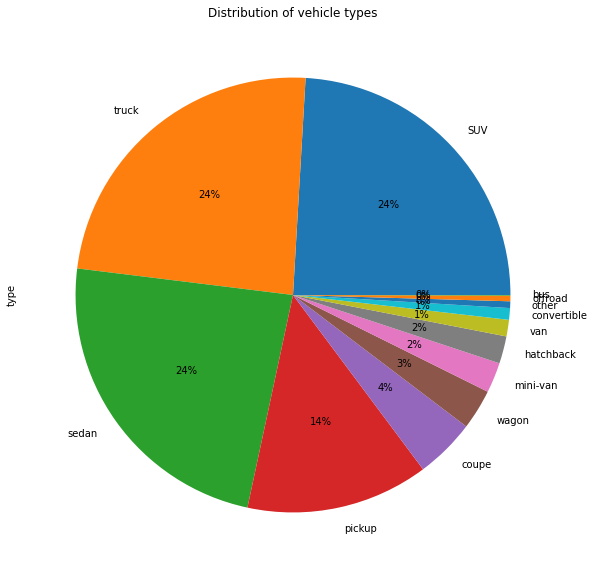

In [37]:
# Distribution of vehicle types
print(data['type'].value_counts())
data['type'].value_counts().plot(
    kind='pie', 
    autopct='%1.0f%%', 
    figsize=(10, 10),
    title=('Distribution of vehicle types')
)
plt.show()

In [38]:
# Trucks vs pickups. Checking models that belongs to the truks and to pickup type simalteniously. 

truck_list = data.query('type == "truck"')['model'].unique().tolist()
truck_list.sort()
print(f'Amount of "truck"-type models: {len(truck_list)}')
print(truck_list)
print()
pickup_list = data.query('type == "pickup"')['model'].unique().tolist()
pickup_list.sort()
print(f'Amount of "pickup"-type models: {len(pickup_list)}')
print(pickup_list)
print()
both_list = list(set(truck_list) & set(pickup_list))
print(f'Amount of both "truck" and "pickup"-type models: {len(both_list)}')
print(both_list)
print()
print(f'Types of "nissan maxima" model in the dataset: ', 
      data.query('model == "nissan maxima"')['type'].unique())
print(f'Types of "ford f-150 model" in the dataset: ', 
      data.query('model == "ford f-150"')['type'].unique())
print()
model_type = data.groupby('model')['type'].value_counts()
print(model_type.tail(50))
print()

Amount of "truck"-type models: 56
['bmw x5', 'buick enclave', 'cadillac escalade', 'chevrolet colorado', 'chevrolet corvette', 'chevrolet malibu', 'chevrolet silverado', 'chevrolet silverado 1500', 'chevrolet silverado 1500 crew', 'chevrolet silverado 2500hd', 'chevrolet silverado 3500hd', 'chevrolet suburban', 'chevrolet tahoe', 'dodge dakota', 'ford econoline', 'ford escape', 'ford expedition', 'ford explorer', 'ford f-150', 'ford f-150 supercrew cab xlt', 'ford f-250', 'ford f-250 sd', 'ford f-250 super duty', 'ford f-350', 'ford f-350 sd', 'ford f-350 super duty', 'ford fusion se', 'ford ranger', 'gmc sierra', 'gmc sierra 1500', 'gmc sierra 2500hd', 'gmc yukon', 'honda accord', 'honda odyssey', 'honda pilot', 'hyundai santa fe', 'jeep cherokee', 'jeep grand cherokee', 'jeep grand cherokee laredo', 'jeep liberty', 'jeep wrangler', 'jeep wrangler unlimited', 'nissan altima', 'nissan frontier', 'nissan frontier crew cab sv', 'nissan maxima', 'nissan murano', 'ram 1500', 'ram 2500', 'r

We grouped the `model` and `type` values and calculated the most common `type` for each `model`, which in the most cases is the only one possible. There may be few exceptions (like sedan and coupe body types for the same listed model) but they are very rare and will not affect our conclusions.  The dictionary whith `model` as a key and `type` as value will be used to create a new column with unified types. 

In [39]:
# Creating dictionary of the most common types for each model

model_type_dict = data.groupby('model')['type'].apply(lambda x: x.value_counts().idxmax()).to_dict()
print(len(model_type_dict))
print(model_type_dict)

97
{'acura tl': 'sedan', 'bmw x5': 'SUV', 'buick enclave': 'SUV', 'cadillac escalade': 'SUV', 'chevrolet camaro': 'coupe', 'chevrolet camaro lt coupe 2d': 'coupe', 'chevrolet colorado': 'truck', 'chevrolet corvette': 'coupe', 'chevrolet cruze': 'sedan', 'chevrolet equinox': 'SUV', 'chevrolet impala': 'sedan', 'chevrolet malibu': 'sedan', 'chevrolet silverado': 'truck', 'chevrolet silverado 1500': 'truck', 'chevrolet silverado 1500 crew': 'pickup', 'chevrolet silverado 2500hd': 'truck', 'chevrolet silverado 3500hd': 'truck', 'chevrolet suburban': 'SUV', 'chevrolet tahoe': 'SUV', 'chevrolet trailblazer': 'SUV', 'chevrolet traverse': 'SUV', 'chrysler 200': 'sedan', 'chrysler 300': 'sedan', 'chrysler town & country': 'mini-van', 'dodge charger': 'sedan', 'dodge dakota': 'truck', 'dodge grand caravan': 'mini-van', 'ford econoline': 'truck', 'ford edge': 'SUV', 'ford escape': 'SUV', 'ford expedition': 'SUV', 'ford explorer': 'SUV', 'ford f-150': 'truck', 'ford f-150 supercrew cab xlt': 'pick

We will create separate column named `type_unified` which will contains unique type for each model being the most common type for the said model in our dataset.

In [40]:
# Creating type_unified column based on our dictionary

data['type_unified'] = data['model'].map(model_type_dict)

# Checking that function was applied correctly

print(data.info())
print(data.head(15))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   price                 51525 non-null  int64         
 1   model_year            51525 non-null  int64         
 2   model                 51525 non-null  object        
 3   condition             51525 non-null  int64         
 4   cylinders             51525 non-null  int64         
 5   fuel                  51525 non-null  object        
 6   odometer              51525 non-null  int64         
 7   transmission          51525 non-null  object        
 8   type                  51525 non-null  object        
 9   color                 51525 non-null  object        
 10  is_4wd                51525 non-null  int64         
 11  date_posted           51525 non-null  object        
 12  days_listed           51525 non-null  int64         
 13  cylinders_unifie

Then we will group all types with share less then 4% percent of the dataframe in the group named 'other'.

In [41]:
# Groupping of the types with smallest share in the dataset into "other" category

data['type_unified'] = data['type_unified'].replace(['hatchback', 'van', 'mini-van', 
                                                     'convertable', 'offroad', 'bus', 'wagon'], 'other')
print(data['type_unified'].describe())

count     51525
unique        6
top       truck
freq      18098
Name: type_unified, dtype: object


The new `unified_type` column was succefully added to our dataframe, it contents 6 unique values with "truck" value on top.

### Distribution of `color`

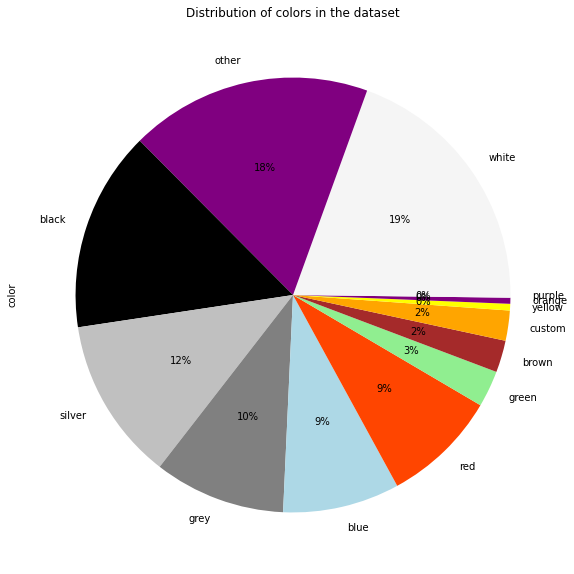

In [42]:
# Checking distribution in the original dataset

my_colors_enr = ['whitesmoke', 'purple', 'black', 'silver', 'grey', 
                 'lightblue', 'orangered', 'lightgreen', 'brown', 'orange', 'yellow', 'purple']

data['color'].value_counts().plot(
    kind='pie', 
    autopct='%1.0f%%', 
    figsize=(10, 10), 
    colors = my_colors_enr, 
    title='Distribution of colors in the dataset')
plt.show()

We have 6 colors of equal or less then 3% share of the dataframe, which should be combined in one group named "other" in order not to overload our visualization. We will store this data in the new `color_unified` column. 


count     51525
unique        7
top       other
freq      13627
Name: color_unified, dtype: object

other     13627
white     10029
black      7692
silver     6244
grey       5037
blue       4475
red        4421
Name: color_unified, dtype: int64


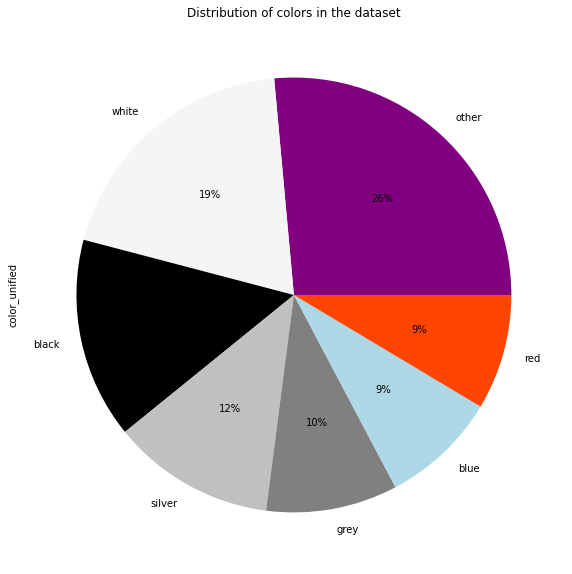

In [43]:
# Creating new column for color_unified

data['color_unified'] = data['color'].replace(['green', 'brown', 'custom', 'yellow', 
                                               'orange', 'purple'], 'other')

# Cheking distribution of color_unified
my_colors_unified = ['purple', 'whitesmoke', 'black', 'silver', 'grey', 'lightblue', 
                     'orangered', 'lightgreen', 'brown', 'orange', 'yellow', 'purple']

data['color_unified'].value_counts().plot(
    kind='pie', 
    autopct='%1.0f%%', 
    figsize=(10, 10), 
    colors=my_colors_unified, 
    title='Distribution of colors in the dataset')
print()
print(data['color_unified'].describe())
print()
print(data['color_unified'].value_counts())

Besides the 'other' chart sector, which is mostly consisits of values of missing colors - the leader is white color, occuping about one fifths of the dataframe, 3 other major colors (black, silver and grey) exceeding 10% and two equal 9% shares for blue and red colors. 

## Check clean data

Our data is now ready for the analysis, we can take just another quick look at it.

In [44]:
# printing the general/summary information about the DataFrame
print(data.info())
print()
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   price                 51525 non-null  int64         
 1   model_year            51525 non-null  int64         
 2   model                 51525 non-null  object        
 3   condition             51525 non-null  int64         
 4   cylinders             51525 non-null  int64         
 5   fuel                  51525 non-null  object        
 6   odometer              51525 non-null  int64         
 7   transmission          51525 non-null  object        
 8   type                  51525 non-null  object        
 9   color                 51525 non-null  object        
 10  is_4wd                51525 non-null  int64         
 11  date_posted           51525 non-null  object        
 12  days_listed           51525 non-null  int64         
 13  cylinders_unifie

In [45]:
# printing a sample of data
print(data.head(10))

   price  model_year           model  condition  cylinders fuel  odometer  \
0   9400        2011          bmw x5          2          6  gas    145000   
1  25500        2013      ford f-150          2          6  gas     88705   
2   5500        2013  hyundai sonata          4          4  gas    110000   
3   1500        2003      ford f-150          1          8  gas    167599   
4  14900        2017    chrysler 200          3          4  gas     80903   
5  14990        2014    chrysler 300          3          6  gas     57954   
6  12990        2015    toyota camry          3          4  gas     79212   
7  15990        2013     honda pilot          3          6  gas    109473   
8  11500        2012     kia sorento          3          4  gas    104174   
9   9200        2008     honda pilot          3          6  gas    147191   

  transmission    type  color  is_4wd date_posted  days_listed  \
0    automatic     SUV  other       1  2018-06-23           19   
1    automatic  pick

We have the dataframe with the same 51525 rows now containig no missing values and a number of columns added for analysis such as:  
`cylinders_unified` which contains all common engine types and "other" category for odd values,  
`date_posted_datetime` which contains date posted values in the datetime format,  
`car_age` which contains the age of each vehicle at the date the ad was published,  
`milage_per_year` which contains yearly average milage of the vehicles,  
`type_unified` with types of the vehicle grouped by the most popular type for each model and  
`color_unified` with the most widespread colors.      

## Studing core parameters

In order to answer the main questions of this project we now need tho explore major price-affecting parameters for outliers, that can interfere with drawing correct conclusions.

The major parameters are:
- Price
- The vehicle's age when the ad was placed
- Mileage
- Number of cylinders
- Condition

### Price

In [46]:
# Defining function for numerical data

def distribution_IQR_hist(parameter):
    print(f'The histogram of: {parameter}')
    data[parameter].hist(bins=50, figsize=(10, 5))
    plt.show()
    if data[parameter].mean()>data[parameter].median():
        print('The distribution is skewed to the right')
    else:
        print('The distribution is skewed to the left')
    print('---------------------------------------')
    print(f'Statistics on: {parameter}')
    print(data[parameter].describe())
    Q1 = data[parameter].quantile(0.25)
    Q3 = data[parameter].quantile(0.75)
    IQR = Q3 - Q1
    min_iqr=Q1-1.5*IQR
    max_iqr=Q3+1.5*IQR
    print('---------------------------------------')
    print('min border:', min_iqr)
    print('max border:', max_iqr)
    print('---------------------------------------')
    if min_iqr<0:
        print(f'The outliers are considered to be values above', max_iqr)
        print(f'We have {len(data[data[parameter]>max_iqr])} values that we can consider outliers')
    else:
        print(f'The outliers are considered to be values below {min_iqr} and above {max_iqr}')
        print(f'We have {len(data[(data[parameter]<min_iqr)|(data[parameter]>max_iqr)])} '
              f'values that we can consider outliers')


The histogram of: price


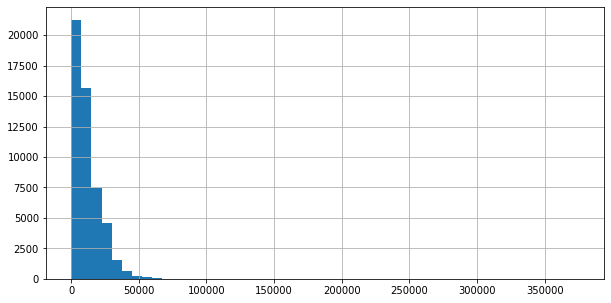

The distribution is skewed to the right
---------------------------------------
Statistics on: price
count     51525.000000
mean      12132.464920
std       10040.803015
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: price, dtype: float64
---------------------------------------
min border: -12758.5
max border: 34597.5
---------------------------------------
The outliers are considered to be values above 34597.5
We have 1646 values that we can consider outliers
None


In [47]:
# Checking distribution and outliers for price

# Calling the function

print(distribution_IQR_hist('price'))

We have a huge range of data in `price` column - from 1 to 375000. Althogh values less then 100 seem to be impossible for such goods as vehicles (only applicable for cars after severe accidents) the major affect caused by extremely high `price` values. We can consider all entries with values more, then 34597.5 as outliers. 

### Car age at the moment  the ad was placed

The histogram of: car_age


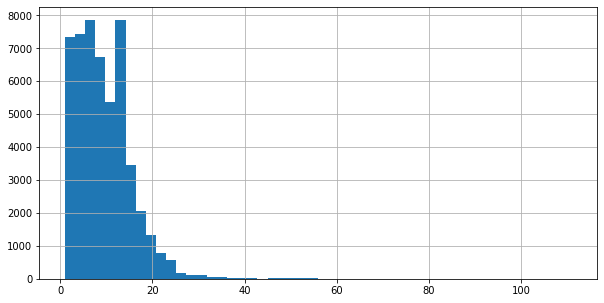

The distribution is skewed to the right
---------------------------------------
Statistics on: car_age
count    51525.000000
mean         9.435148
std          6.158348
min          1.000000
25%          5.000000
50%          8.000000
75%         13.000000
max        111.000000
Name: car_age, dtype: float64
---------------------------------------
min border: -7.0
max border: 25.0
---------------------------------------
The outliers are considered to be values above 25.0
We have 737 values that we can consider outliers
None


In [48]:
# Checking distribution and outliers for car_age

print(distribution_IQR_hist('car_age'))

We have the similar situation for the `car_age` values (although in case of age 0 values mean "new" cars on the market) - the majority of ads live no more then 24 days and all entries with values more, then 24 should be considered outliers.

### Milage

The histogram of: odometer


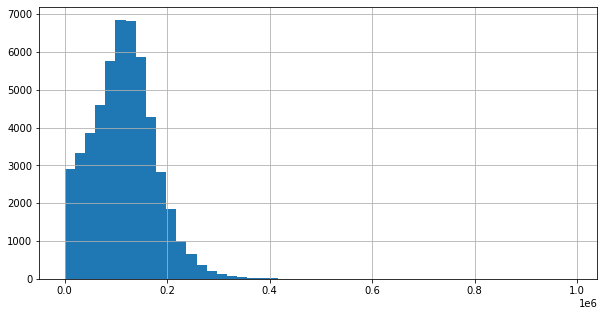

The distribution is skewed to the right
---------------------------------------
Statistics on: odometer
count     51525.000000
mean     115253.571276
std       62688.696309
min           0.000000
25%       72000.000000
50%      113849.000000
75%      153000.000000
max      990000.000000
Name: odometer, dtype: float64
---------------------------------------
min border: -49500.0
max border: 274500.0
---------------------------------------
The outliers are considered to be values above 274500.0
We have 607 values that we can consider outliers
None


In [49]:
# Checking distribution and outliers for milage

print(distribution_IQR_hist('odometer'))

Milage range is even more then the `price` one. All entries with more then 273835.5 should be considered outliers. Thу abnormal amount of values around 0 will be explored while checking `condition` column

The histogram of: milage_per_year


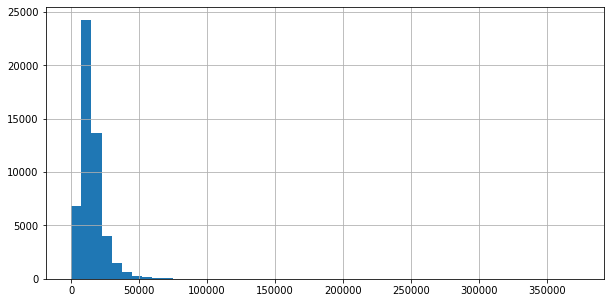

The distribution is skewed to the right
---------------------------------------
Statistics on: milage_per_year
count     51525.000000
mean      14840.252712
std        9271.834993
min           0.000000
25%        9786.000000
50%       13304.000000
75%       18000.000000
max      373200.000000
Name: milage_per_year, dtype: float64
---------------------------------------
min border: -2535.0
max border: 30321.0
---------------------------------------
The outliers are considered to be values above 30321.0
We have 2569 values that we can consider outliers
None


In [50]:
# Checking distribution and outliers for milage per year

print(distribution_IQR_hist('milage_per_year'))

`Milage_per_year` factor makes sence for the cars of the first five years after manufacturing when it is accompanied by the evidence of whether or not vechicle had warranty and proper warranty service with its dealer at this time. Since we have no such information in our dataset this columns is just `odometer` devided by `car_age` and major focus of the potential buyer will be on `odometer`.

### Number of cylinders

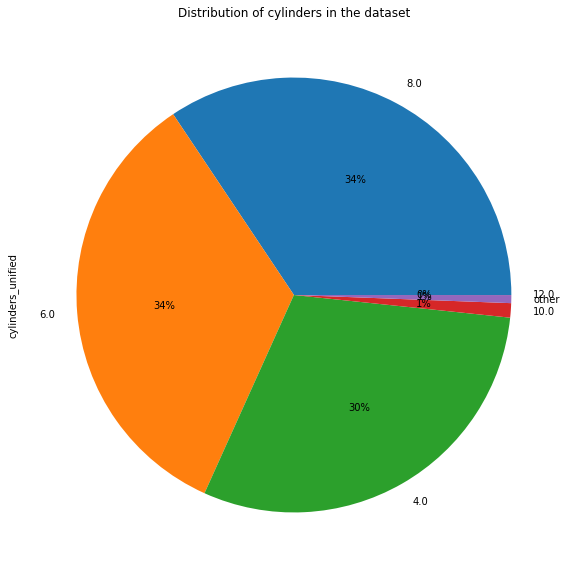

In [51]:
# Checking distribution among cylinders column
data['cylinders_unified'].value_counts().plot(
    kind='pie', 
    autopct='%1.0f%%', 
    figsize=(10, 10), 
    title='Distribution of cylinders in the dataset')
plt.show()

There are three major engine types dominating in the dataset - 4-, 6- and 8-cylinder engines. For two other engines (10 & 12 cylinders) market share is around 1% or less. The same situation is with 3- and 5-cylinder entries, combined in 'other' category. We can add 10 and 12 cylinder values into one category that we name 'other'.

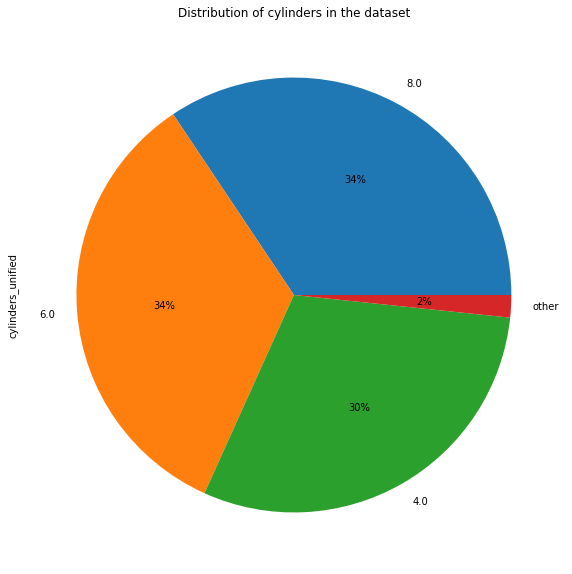

In [52]:
# Replacing 10 & 12 values with 'other'

data['cylinders_unified'] = data['cylinders_unified'].replace([10, 12], 'other')

# Checking the distribution of cylinder_unified values

data['cylinders_unified'].value_counts().plot(
    kind='pie', 
    autopct='%1.0f%%', 
    figsize=(10, 10), 
    title='Distribution of cylinders in the dataset')
plt.show()

Cylinders values 3, 5, 10 and 12 can be considered as outliers since the share of such values is around 2% of the dataframe. 

### Condition

Condition is one of the key factors determing the demand and the price of the vehicle on the market. The most common approach is that the price of the new car falls down up to 25%-30% as soon as the car leaves the dealer. Although data in `condition` column looked perfect at first sight in terms of missing values and were spelled correctly, the terms "new", "like new" and others were not defined monosemantic and included, for example, "new" vehicles produced up to 20 years ago with milage more then 500000. it would be interesting to look more seriously on this milage distribution in other `type` sections.

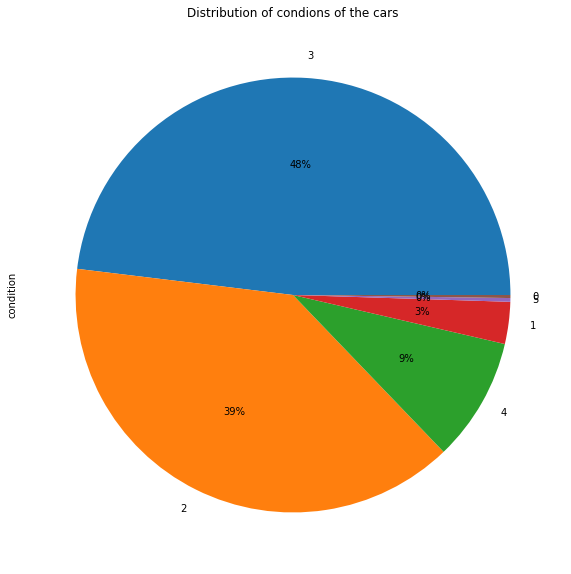

In [53]:
# Cheking for the distribution of values in condition column

data['condition'].value_counts().plot(
    kind='pie', 
    autopct='%1.0f%%', 
    figsize=(10, 10), 
    title='Distribution of condions of the cars')
plt.show()

The histogram of: 5


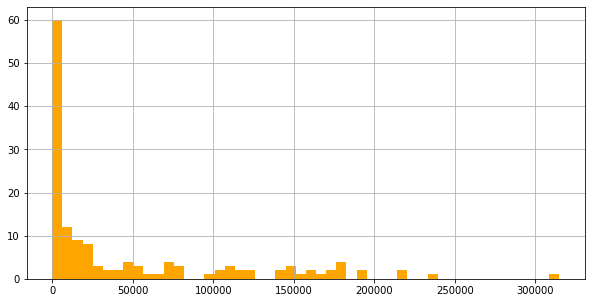

The distribution is skewed to the right
---------------------------------------
Statistics on: 5
count       143.000000
mean      46199.034965
std       65883.417532
min           5.000000
25%          42.500000
50%       12000.000000
75%       72500.000000
max      315000.000000
Name: odometer, dtype: float64
---------------------------------------
min border: -108643.75
max border: 181186.25
---------------------------------------
The outliers are considered to be values above 181186.25
We have 143 values that we can consider outliers

Model_years of the "new" type vehicles: [2016 2018 2019 2009 2013 2012 2008 2007 2014 2005 2002 1968 2011 2017
 2006 2000 1999 2004 2010 2015 1969 2003 1984]

The histogram of: 4


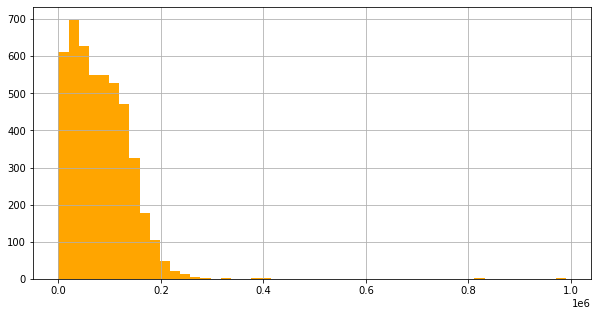

The distribution is skewed to the right
---------------------------------------
Statistics on: 4
count      4742.000000
mean      80776.599747
std       55853.871382
min           0.000000
25%       36148.000000
50%       74931.000000
75%      118155.000000
max      990000.000000
Name: odometer, dtype: float64
---------------------------------------
min border: -86862.5
max border: 241165.5
---------------------------------------
The outliers are considered to be values above 241165.5
We have 4742 values that we can consider outliers

The histogram of: 3


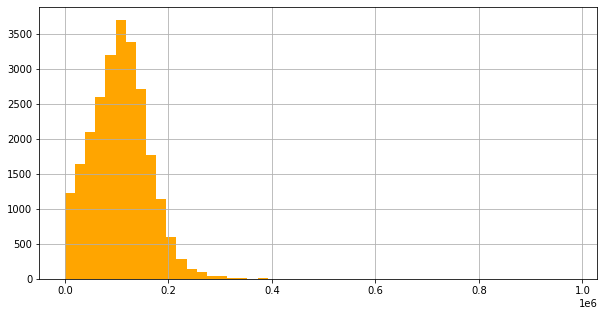

The distribution is skewed to the right
---------------------------------------
Statistics on: 3
count     24773.000000
mean     106978.399265
std       56200.053397
min           0.000000
25%       68302.000000
50%      105731.000000
75%      141000.000000
max      980000.000000
Name: odometer, dtype: float64
---------------------------------------
min border: -40745.0
max border: 250047.0
---------------------------------------
The outliers are considered to be values above 250047.0
We have 24773 values that we can consider outliers

The histogram of: 2


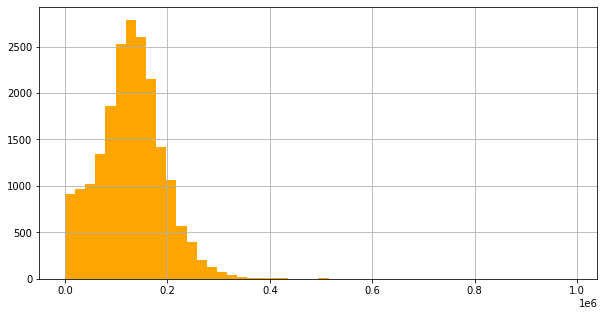

The distribution is skewed to the left
---------------------------------------
Statistics on: 2
count     20145.000000
mean     128861.694366
std       64116.822423
min           0.000000
25%       88989.000000
50%      129000.000000
75%      168000.000000
max      990000.000000
Name: odometer, dtype: float64
---------------------------------------
min border: -29527.5
max border: 286516.5
---------------------------------------
The outliers are considered to be values above 286516.5
We have 20145 values that we can consider outliers

The histogram of: 1


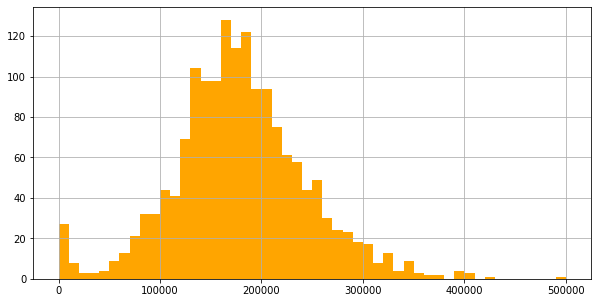

The distribution is skewed to the right
---------------------------------------
Statistics on: 1
count      1607.00000
mean     178379.69135
std       65841.59390
min           0.00000
25%      139000.00000
50%      175000.00000
75%      215000.00000
max      500000.00000
Name: odometer, dtype: float64
---------------------------------------
min border: 25000.0
max border: 329000.0
---------------------------------------
The outliers are considered to be values below 25000.0 and above 329000.0

The histogram of: 0


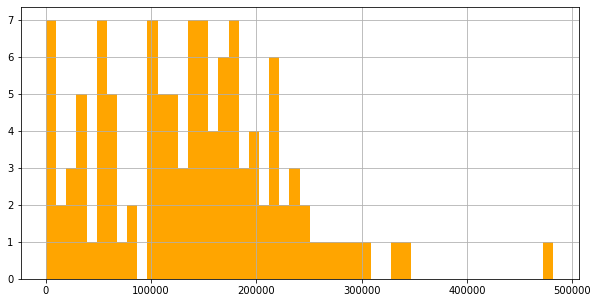

The distribution is skewed to the left
---------------------------------------
Statistics on: 0
count       115.000000
mean     139480.695652
std       86089.567759
min           0.000000
25%       63723.000000
50%      141000.000000
75%      189694.000000
max      482000.000000
Name: odometer, dtype: float64
---------------------------------------
min border: -125233.5
max border: 378650.5
---------------------------------------
The outliers are considered to be values above 378650.5
We have 115 values that we can consider outliers


In [54]:
# Checking for the distribution of the odometer values regarding type categories 

def condition_odometer(x):
    print(f'The histogram of: {x}')
    data.query('condition == @x')['odometer'].hist(bins=50, color='orange', figsize=(10, 5))
    plt.show()
    if data.query('condition == @x')['odometer'].mean()>data.query('condition == @x')['odometer'].median():
        print('The distribution is skewed to the right')
    else:
        print('The distribution is skewed to the left')
    print('---------------------------------------')
    print(f'Statistics on: {x}')
    print(data.query('condition == @x')['odometer'].describe())
    Q1 = data.query('condition == @x')['odometer'].quantile(0.25)
    Q3 = data.query('condition == @x')['odometer'].quantile(0.75)
    IQR = Q3 - Q1
    min_iqr=Q1-1.5*IQR
    max_iqr=Q3+1.5*IQR
    print('---------------------------------------')
    print('min border:', min_iqr)
    print('max border:', max_iqr)
    print('---------------------------------------')
    if min_iqr<0:
        print(f'The outliers are considered to be values above', max_iqr)
        print(f'We have {len(data.query("condition == @x")["odometer"]>max_iqr)} '
              f'values that we can consider outliers')
    else:
        print(f'The outliers are considered to be values below {min_iqr} and above {max_iqr}')

# Calling function for different condition values        

condition_odometer(5)
print()
print(f'Model_years of the "new" type vehicles: {data.query("condition == 5")["model_year"].unique()}')
print()
condition_odometer(4)
print()
condition_odometer(3)
print()
condition_odometer(2)
print()
condition_odometer(1)
print()
condition_odometer(0)    

The "new" condition vehicles in our dataset were produced in the wide range of years - from 2000 up to 2019. It is very unusual situation when "new" cars have not been sold for a couple of decades. This data seem as an impossible for the "new" cars. Besides the sale of new cars and factors affecting the demand and price for new vehicles are different from the secondary market. That's why we can consider 143 entries with "new" in `condition` (less, then 0.3% of the dataframe) as outliers.  
  
"Like new" type has a right-skewed distribution with a large number of values far right (over 150000 milage) which definetely should be considered as outliers, since 50% of vehicles has reasonable milage not exceeding 36000. "Excellent" and "fair' condition histograms show pretty normal distribution of values, but with an inexplicable spike in data around zero, which should also be considered as outliers.  
  
115 entries with "salvage" in `condition` (less,  0.2% of the dataframe) can also be considered as outliers. They also have abnormal amount of 0 and around 0 values.  

We do not know exact criteria for definition of type's categories but this milage distribution with a whole bunch of 0 `odometer` as well as far right values looks like this field was in a large amount of entries was filled in randomly.

## Study and treat outliers


Based on previous researhs we determine the following columns with outliers:  
`price`  
`condition`  
`cylinders`  
`odometer`  
`car_age`   
`days_listed`
  
For data without outliers we will create a new dataframe `data_filtered`.


### Treating outliers in `price`

In [55]:
# Creating new dataset without outliers for the price column.

data_filtered = data.query('price < 34597.5')

# Checking that everuthing is correct

print(data_filtered.info())
print()
print(data_filtered['price'].describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49879 entries, 0 to 51524
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   price                 49879 non-null  int64         
 1   model_year            49879 non-null  int64         
 2   model                 49879 non-null  object        
 3   condition             49879 non-null  int64         
 4   cylinders             49879 non-null  int64         
 5   fuel                  49879 non-null  object        
 6   odometer              49879 non-null  int64         
 7   transmission          49879 non-null  object        
 8   type                  49879 non-null  object        
 9   color                 49879 non-null  object        
 10  is_4wd                49879 non-null  int64         
 11  date_posted           49879 non-null  object        
 12  days_listed           49879 non-null  int64         
 13  cylinders_unifie

We excluded all values more then 34595 from our dataframe.

### Treating outliers in `condition`

Then we will drop off all outliers in every `condition` category except 5 ("new") and 0 ("salvage"), which we will drop off entirely as outliers.

In [56]:
# Treating outliers in categories one by one

data_filtered = data_filtered.drop(data_filtered[(data_filtered.condition==4) & 
                                                 (data_filtered.odometer>241165.5)].index)
data_filtered = data_filtered.drop(data_filtered[(data_filtered.condition==3) & 
                                                 (data_filtered.odometer>250047)].index)
data_filtered = data_filtered.drop(data_filtered[(data_filtered.condition==2) & 
                                                 (data_filtered.odometer>286516.5)].index)
data_filtered = data_filtered.drop(data_filtered[(data_filtered.condition==1) & 
                                                 (data_filtered.odometer>329000)].index)
data_filtered = data_filtered.drop(data_filtered[(data_filtered.condition==1) & 
                                                 (data_filtered.odometer<25000)].index)
data_filtered = data_filtered.query('0 < condition < 5')

# Checking that everything is correct

print(data_filtered['condition'].unique())

print(data_filtered.info())

[2 4 1 3]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 49089 entries, 0 to 51524
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   price                 49089 non-null  int64         
 1   model_year            49089 non-null  int64         
 2   model                 49089 non-null  object        
 3   condition             49089 non-null  int64         
 4   cylinders             49089 non-null  int64         
 5   fuel                  49089 non-null  object        
 6   odometer              49089 non-null  int64         
 7   transmission          49089 non-null  object        
 8   type                  49089 non-null  object        
 9   color                 49089 non-null  object        
 10  is_4wd                49089 non-null  int64         
 11  date_posted           49089 non-null  object        
 12  days_listed           49089 non-null  int64         
 13  cylind

### Treating outliers in `cylinders`

For `cylinders_unified` column we can treat "other" sector, containing of engines with 3, 5, 10 and 12 cylinders as outlier since this is a categorial values. The absolut majority of the models in the dataset have either 4, or 6 or 8 cylinders' engines.  

In [57]:
# Dropping off outliers in cylinders_unified column

data_filtered = data_filtered.query('cylinders_unified != "other"')

# Checking that everything is correct

# Fixing data types

data_filtered['cylinders_unified'] = data_filtered['cylinders_unified'].astype('int')

# Checking the remaining unique values in cylinders column

print(data_filtered['cylinders_unified'].unique())

[6 4 8]


Now we have only 3 major engine types in the filtered dataset.

### Treating outliers in `odometer` column

The histogram of: odometer


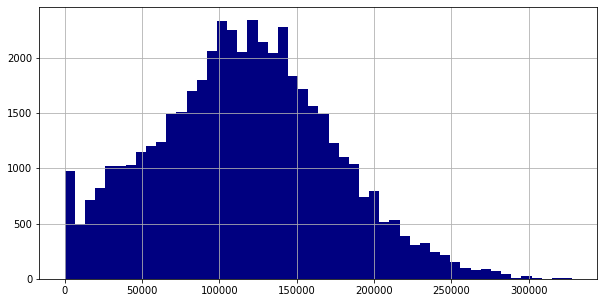

The distribution is skewed to the right
---------------------------------------
Statistics on: odometer
count     48248.000000
mean     115834.179614
std       56926.798262
min           0.000000
25%       76000.000000
50%      115653.000000
75%      153322.000000
max      328000.000000
Name: odometer, dtype: float64
---------------------------------------
min border: -39983.0
max border: 269305.0
---------------------------------------
The outliers are considered to be values above 269305.0
We have 48248 values that we can consider outliers
None


In [58]:
# Distribution in odometer column

def parameter_filtered(x):
    print(f'The histogram of: {x}')
    data_filtered[x].hist(bins=50, color='navy', figsize=(10, 5))
    plt.show()
    if data_filtered[x].mean()>data_filtered[x].median():
        print('The distribution is skewed to the right')
    else:
        print('The distribution is skewed to the left')
    print('---------------------------------------')
    print(f'Statistics on: {x}')
    print(data_filtered[x].describe())
    Q1 = data_filtered[x].quantile(0.25)
    Q3 = data_filtered[x].quantile(0.75)
    IQR = Q3 - Q1
    min_iqr=Q1-1.5*IQR
    max_iqr=Q3+1.5*IQR
    print('---------------------------------------')
    print('min border:', min_iqr)
    print('max border:', max_iqr)
    print('---------------------------------------')
    if min_iqr<0:
        print(f'The outliers are considered to be values above', max_iqr)
        print(f'We have {len(data_filtered[x]>max_iqr)} values that we can consider outliers')
    else:
        print(f'The outliers are considered to be values below {min_iqr} and above {max_iqr}')

print(parameter_filtered('odometer'))

In [59]:
# Treating the odometer outliers

data_filtered = data_filtered.query('odometer <= 269305')

# Cheking that everything is correct

print(data_filtered['odometer'].describe())

count     47992.000000
mean     114939.111269
std       55730.768009
min           0.000000
25%       75701.500000
50%      115163.000000
75%      152657.000000
max      269000.000000
Name: odometer, dtype: float64


### Treating `car_age` outliers

In [60]:
# Filtering the car_age column

data_filtered = data_filtered.query('car_age <= 24')

# Cheking if everuthing is correct

print(data_filtered['car_age'].describe())

count    47189.000000
mean         9.134714
std          5.020486
min          1.000000
25%          5.000000
50%          8.000000
75%         13.000000
max         24.000000
Name: car_age, dtype: float64


Everithing is fixed and the maximum car_age is stipulated to 24 years.

### Treating outliers in `days_listed`

The histogram of: days_listed


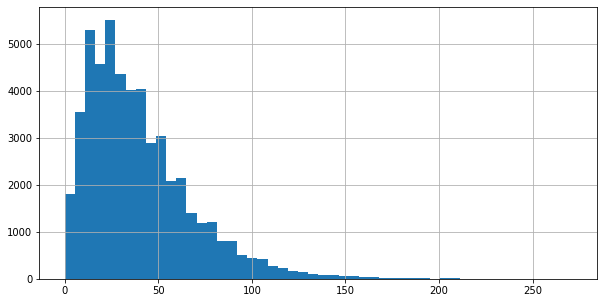

The distribution is skewed to the right
---------------------------------------
Statistics on: days_listed
count    51525.00000
mean        39.55476
std         28.20427
min          0.00000
25%         19.00000
50%         33.00000
75%         53.00000
max        271.00000
Name: days_listed, dtype: float64
---------------------------------------
min border: -32.0
max border: 104.0
---------------------------------------
The outliers are considered to be values above 104.0
We have 1618 values that we can consider outliers

Number of entries with 0 value in days_listed: 48

count    47189.000000
mean        39.531035
std         28.199813
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64


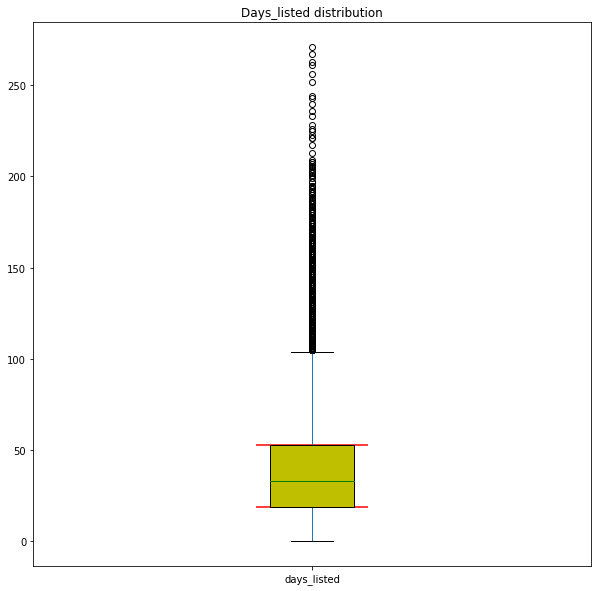

In [61]:
# Checking days_listed distribution over dataset

distribution_IQR_hist('days_listed')
print()
print(f'Number of entries with 0 value in days_listed: '
      f'{len(data_filtered.query("days_listed == 0"))}')

Q1 = data_filtered['days_listed'].quantile(0.25)
Q3 = data_filtered['days_listed'].quantile(0.75)
data_filtered['days_listed'].plot(
    kind='box', 
    figsize=(10,10), 
    medianprops=dict(color='green'), 
    patch_artist=True, 
    boxprops=dict(facecolor='y'), 
    title='Days_listed distribution')
plt.hlines(y=[Q1, Q3], xmin=0.9, xmax=1.1, color='red')
print()
print(data_filtered['days_listed'].describe())

Besides over 104 days values we have 48 entries with 0 days display which also should be considered outliers at this time since 0 days display has no scence.

In [62]:
# Dropping off the outliers and 0 values

data_filtered = data_filtered.query('days_listed != 0 & days_listed <= 104')

# Checking filtered data

print(data_filtered['days_listed'].describe())

count    45665.000000
mean        36.698018
std         23.170710
min          1.000000
25%         18.000000
50%         32.000000
75%         51.000000
max        104.000000
Name: days_listed, dtype: float64


Now we have distribution of ads lifetime without outliers and 0 values.

In [63]:
# Cheking the amount of dropped data

print(f'Number of entries dropped: {len(data) - len(data_filtered)}')
print(f'Percentage of lost data is: {(len(data) - len(data_filtered))/len(data):.1%}')
print()
print(data_filtered.info())

Number of entries dropped: 5860
Percentage of lost data is: 11.4%

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45665 entries, 0 to 51524
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   price                 45665 non-null  int64         
 1   model_year            45665 non-null  int64         
 2   model                 45665 non-null  object        
 3   condition             45665 non-null  int64         
 4   cylinders             45665 non-null  int64         
 5   fuel                  45665 non-null  object        
 6   odometer              45665 non-null  int64         
 7   transmission          45665 non-null  object        
 8   type                  45665 non-null  object        
 9   color                 45665 non-null  object        
 10  is_4wd                45665 non-null  int64         
 11  date_posted           45665 non-null  object        
 12  days_li

The size of the filtered dataframe is 45798 rows, so we lost 11.1% of the original data while getting rid off the outliers.

## Studing core parameters without outliers

### Price

The histogram of: price


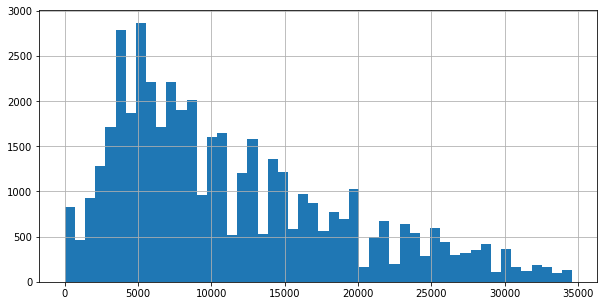

The distribution is skewed to the right
---------------------------------------
Statistics on: price
count    45665.000000
mean     11340.638892
std       7811.421491
min          1.000000
25%       5000.000000
50%       8999.000000
75%      15995.000000
max      34595.000000
Name: price, dtype: float64
---------------------------------------
min border: -11492.5
max border: 32487.5
---------------------------------------
None


In [64]:
# Defining function to check distribution without outliers

def distribution_IQR_hist_filtered(parameter):
    print(f'The histogram of: {parameter}')
    data_filtered[parameter].hist(bins=50, figsize=(10, 5))
    plt.show()
    if data_filtered[parameter].mean()>data_filtered[parameter].median():
        print('The distribution is skewed to the right')
    else:
        print('The distribution is skewed to the left')
    print('---------------------------------------')
    print(f'Statistics on: {parameter}')
    print(data_filtered[parameter].describe())
    Q1 = data_filtered[parameter].quantile(0.25)
    Q3 = data_filtered[parameter].quantile(0.75)
    IQR = Q3 - Q1
    min_iqr=Q1-1.5*IQR
    max_iqr=Q3+1.5*IQR
    print('---------------------------------------')
    print('min border:', min_iqr)
    print('max border:', max_iqr)
    print('---------------------------------------')

    # Calling function to 'price' column

print(distribution_IQR_hist_filtered('price'))

With some exceptions (spikes and dips in graph) we got usual dustribution for time/money spent values. Maximum value is limit to 34595 and median across all models is 8995.

### Condition

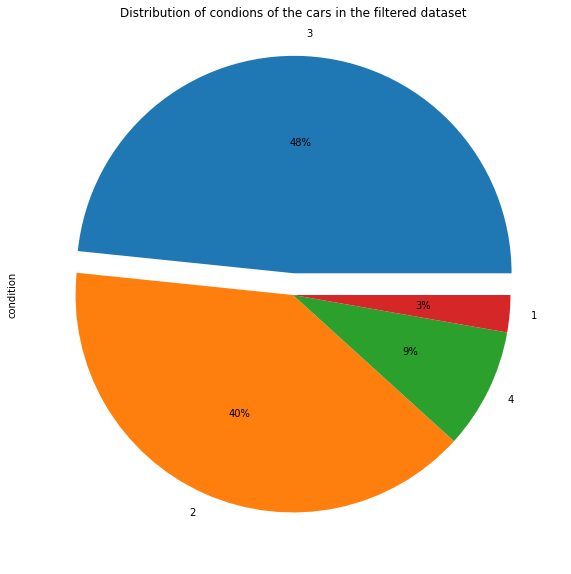

In [65]:
# Cheking distribution of values from condition column without outliers

myexp_con = [0.1, 0, 0, 0]

data_filtered['condition'].value_counts().plot(
    kind='pie', 
    autopct='%1.0f%%', 
    figsize=(10, 10), 
    explode=myexp_con, 
    title='Distribution of condions of the cars in the filtered dataset')
plt.show()

Looking at the distribution of the `condition` values without outliers we can see that a bit less then one half of all entries belongs to cars in "excellent" condition 48%), following by "good" (40%), "like new" (9%) and "fair" (3%).   

### Cylinders

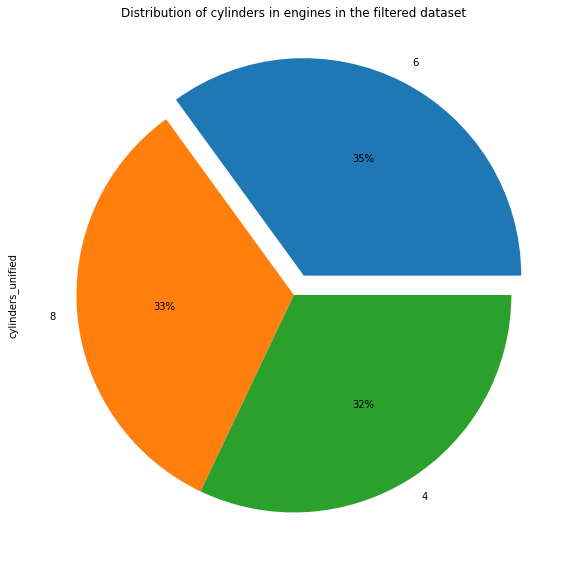

In [66]:
# Cheking the distribution of the cylinders

myexp_cyl = [0.1, 0, 0]
data_filtered['cylinders_unified'].value_counts().plot(
    kind='pie', 
    autopct='%1.0f%%', 
    figsize=(10, 10), 
    explode=myexp_cyl, 
    title='Distribution of cylinders in engines in the filtered dataset')
plt.show()

We can see that in three types (4-, 6- and 8-cylinders) of engines share more or less divide the dataset into approximately three equal parts with a slight advantage for 6 cylinder (35%) whic means that in given sample customers do not prefer any particular engine type regarding its volume.

### Odometer

The histogram of: odometer


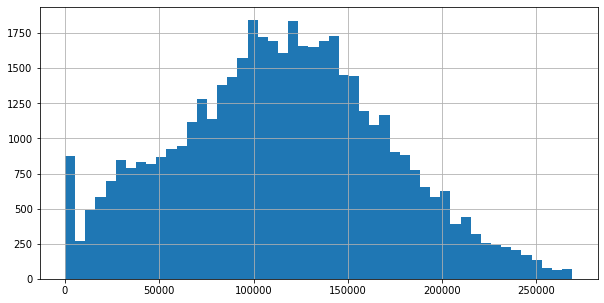

The distribution is skewed to the left
---------------------------------------
Statistics on: odometer
count     45665.000000
mean     114876.175758
std       55581.866806
min           0.000000
25%       75924.000000
50%      115037.000000
75%      152381.000000
max      269000.000000
Name: odometer, dtype: float64
---------------------------------------
min border: -38761.5
max border: 267066.5
---------------------------------------
None


In [67]:
# Calling function for 'odometer' column

print(distribution_IQR_hist_filtered('odometer'))

The plot shows us distribution close to normal, slightly lef-skewed due to the high number of 0 and close to 0 `odometer` values in the original dataset.

### Type

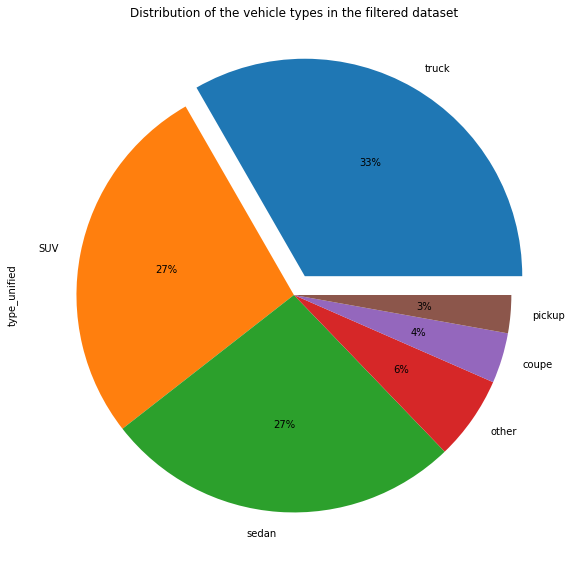

In [68]:
# Plotting the pie chart with the data from new 'type_inified' column

myexp_typ = [0.1, 0, 0, 0, 0, 0]
data_filtered['type_unified'].value_counts().plot(
    kind='pie', 
    autopct='%1.0f%%', 
    figsize=(10, 10), 
    explode=myexp_typ, 
    title='Distribution of the vehicle types in the filtered dataset')
plt.show()

Now we have 6 unique types in the new column instead of original 13, and 3 of them ("truck", "SUV" and "sedan") occupy more the 87% of the market.

### Car_age

The histogram of: car_age


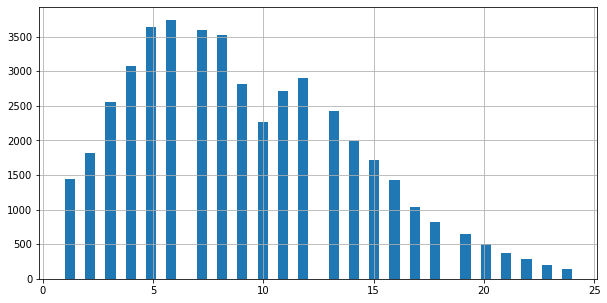

The distribution is skewed to the right
---------------------------------------
Statistics on: car_age
count    45665.000000
mean         9.130997
std          5.022881
min          1.000000
25%          5.000000
50%          8.000000
75%         13.000000
max         24.000000
Name: car_age, dtype: float64
---------------------------------------
min border: -7.0
max border: 25.0
---------------------------------------
None


In [69]:
# Calling function for 'car_age' column

print(distribution_IQR_hist_filtered('car_age'))

We got the usual distribution for time/money values with maximum value of 24 years and median of 7 years, which more or less corresponds to the real life situation.

## Ads lifetime

In [70]:
print(data_filtered['days_listed'].describe())

count    45665.000000
mean        36.698018
std         23.170710
min          1.000000
25%         18.000000
50%         32.000000
75%         51.000000
max        104.000000
Name: days_listed, dtype: float64


AxesSubplot(0.125,0.125;0.775x0.755)


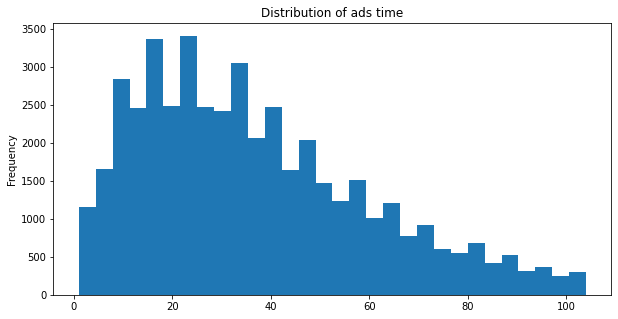

In [71]:
print(data_filtered['days_listed'].plot(kind='hist', bins=30, figsize=(10,5), title='Distribution of ads time'))

The median time of the liftime of the ad is 32 days, which means that a half of the vehicles have been sold within one month. The distribution has the typical rigth-skewed form for noney/time spent values.

The majority of ads have been listed between 18 and 51 days. 

## Average price per each type of vehicle

In [72]:
# Average and median prices per each type of vehicle

print(data_filtered.pivot_table(index='type_unified', values='price', aggfunc=('mean', 'median')))
print()


                      mean   median
type_unified                       
SUV           10508.744334   8900.0
coupe         16013.722060  16990.0
other          8040.195225   6900.0
pickup        19304.761831  22300.0
sedan          6946.931723   5995.0
truck         14955.912600  14000.0



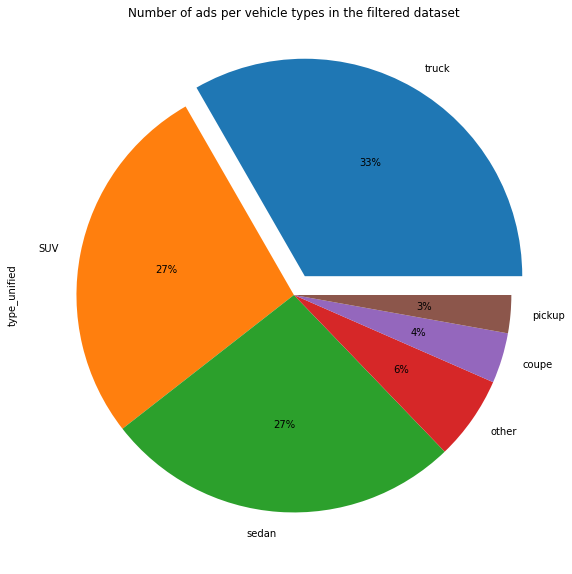

In [73]:
# Plotting the pie chart of the ads per vehicle type.

data_filtered['type_unified'].value_counts().plot(
    kind='pie', 
    autopct='%1.0f%%', 
    figsize=(10, 10), 
    explode=myexp_typ, 
    title='Number of ads per vehicle types in the filtered dataset')
plt.show()

In [74]:
# Calculationg the most popular body types in the dataframe 

print(data_filtered['type_unified'].value_counts())

truck     15206
SUV       12442
sedan     12171
other      2848
coupe      1709
pickup     1289
Name: type_unified, dtype: int64


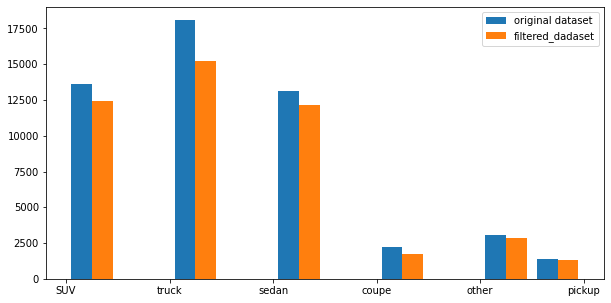

In [75]:
# Comraring original anв filtered dataset 

data_raw = data['type_unified']
data_good = data_filtered['type_unified']
plt.figure(figsize=(10,5))
my_title = 'Distributions of ads'
plt.hist([data_raw, data_good], label = ['original dataset', 'filtered_dadaset'])
plt.legend(loc='upper right')
plt.show()

Three most popular types in our dataset are "truck" and "SUV". 

## Price factors

[What factors impact the price most? Take each of the popular types you detected at the previous stage and study whether the price depends on age, mileage, condition, transmission type, and color. For categorical variables (transmission type and color), plot box-and-whisker charts, and create scatterplots for the rest. When analyzing categorical variables, note that the categories must have at least 50 ads; otherwise, their parameters won't be valid for analysis.]

The most popular types of our dataset are "truck" and "SUV". After elemenating outliers we can now study more precisely what major factors such as age, milage, condition, transmisson type or number of color affect the price of each type.  

### Priсe - milage correlation


Correlation coefficient for price and odometer fot trucks in filtered dataframe: -49.05%
Correlation coefficient for price and odometer fot trucks in original dataframe: -46.13%


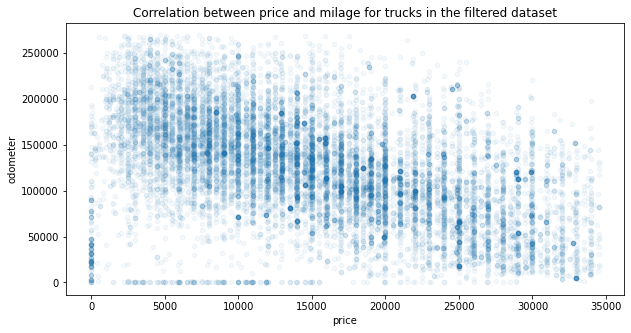

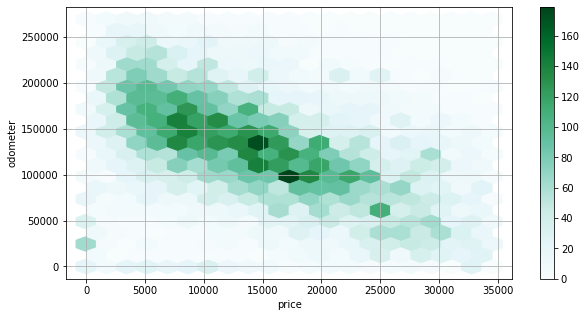

In [76]:
# Calculating price - milage correlation for trucks

data_filtered_truck = data_filtered.query('type_unified == "truck"')
data_truck = data.query('type_unified == "truck"')

data_filtered_truck.plot(
    x='price', 
    y='odometer', 
    kind='scatter', 
    alpha=0.05, 
    figsize=(10,5), 
    title='Correlation between price and milage for trucks in the filtered dataset'
) 
data_filtered_truck.plot(
    x='price', 
    y='odometer', 
    kind='hexbin', 
    gridsize=20, 
    figsize=(10,5), 
    sharex=False, 
    grid=True
)
print()
print(f'Correlation coefficient for price and odometer fot trucks in filtered dataframe: '
      f'{data_filtered_truck["price"].corr(data_filtered_truck["odometer"]):.2%}')
print(f'Correlation coefficient for price and odometer fot trucks in original dataframe:'
      f' {data_truck["price"].corr(data_truck["odometer"]):.2%}')


Correlation coefficient for price and odometer for SUV in filtered dataframe: -55.15%
Correlation coefficient for price and odometer for SUV in original dataframe: -52.36%


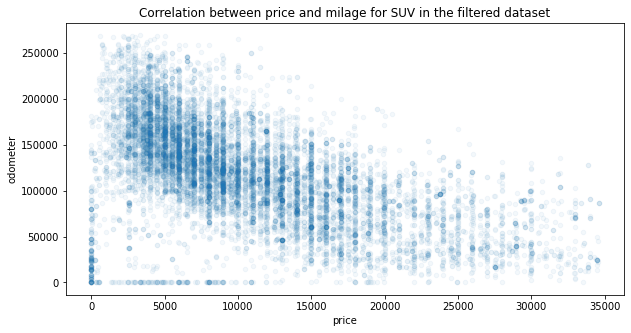

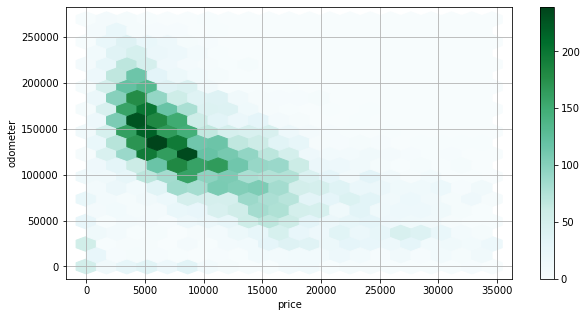

In [77]:
# Calculating price - milage correlation for SUV

data_filtered_SUV = data_filtered.query('type_unified == "SUV"')
data_SUV = data.query('type_unified == "SUV"')

data_filtered_SUV.plot(
    x='price', 
    y='odometer', 
    kind='scatter', 
    alpha=0.05, 
    figsize=(10,5), 
    title='Correlation between price and milage for SUV in the filtered dataset'
) 
data_filtered_SUV.plot(
    x='price', 
    y='odometer', 
    kind='hexbin', 
    gridsize=20, 
    figsize=(10,5), 
    sharex=False, 
    grid=True
)
print()
print(f'Correlation coefficient for price and odometer for SUV in filtered dataframe: '
      f'{data_filtered_SUV["price"].corr(data_filtered_SUV["odometer"]):.2%}')
print(f'Correlation coefficient for price and odometer for SUV in original dataframe: '
      f'{data_SUV["price"].corr(data_SUV["odometer"]):.2%}')

### Price - vehicle age correlation


Correlation coefficient for price and car_age for trucks in filtered dataframe: -63.19%
Correlation coefficient for price and car_age for trucks in original dataframe: -54.95%


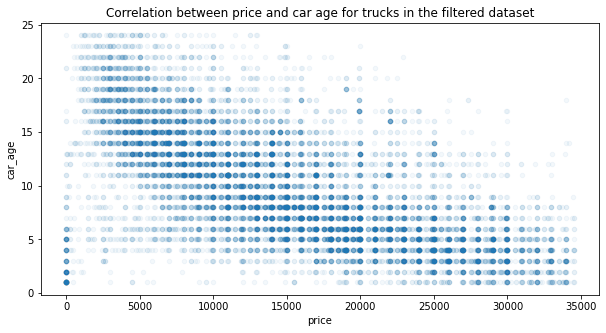

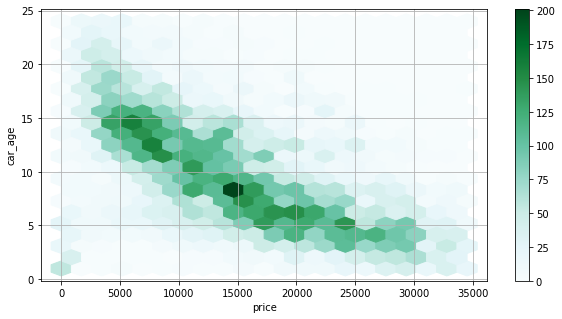

In [78]:
# Calculating price - car_age correlation for trucks

data_filtered_truck.plot(
    x='price', 
    y='car_age', 
    kind='scatter', 
    alpha=0.05, 
    figsize=(10,5), 
    title='Correlation between price and car age for trucks in the filtered dataset'
) 
data_filtered_truck.plot(
    x='price', 
    y='car_age', 
    kind='hexbin', 
    gridsize=20, 
    figsize=(10, 5), 
    sharex=False, 
    grid=True
)
print()
print(f'Correlation coefficient for price and car_age for trucks in filtered dataframe: '
      f'{data_filtered_truck["price"].corr(data_filtered_truck["car_age"]):.2%}')
print(f'Correlation coefficient for price and car_age for trucks in original dataframe: '
      f'{data_truck["price"].corr(data_truck["car_age"]):.2%}')


Correlation coefficient for price and car age for SUV in filtered dataframe: -58.83%
Correlation coefficient for price and car age for SUV in original dataframe: -51.91%


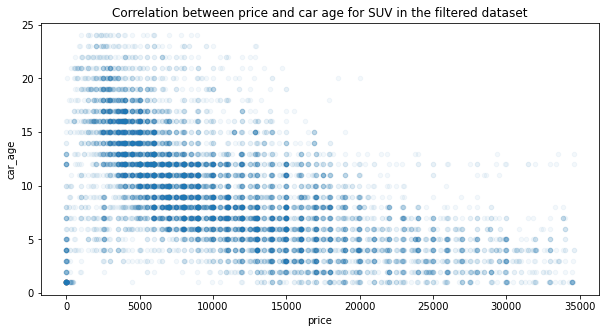

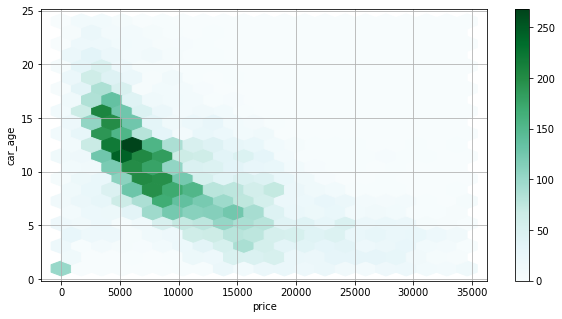

In [79]:
# Calculating price - car_age correlation for SUV

data_filtered_SUV.plot(
    x='price', 
    y='car_age', 
    kind='scatter', 
    alpha=0.05, 
    figsize=(10,5), 
    title='Correlation between price and car age for SUV in the filtered dataset'
) 
data_filtered_SUV.plot(
    x='price', 
    y='car_age', 
    kind='hexbin', 
    gridsize=20, 
    figsize=(10,5), 
    sharex=False, 
    grid=True
)
print()
print(f'Correlation coefficient for price and car age for SUV in filtered dataframe: '
      f'{data_filtered_SUV["price"].corr(data_filtered_SUV["car_age"]):.2%}')
print(f'Correlation coefficient for price and car age for SUV in original dataframe: '
      f'{data_SUV["price"].corr(data_SUV["car_age"]):.2%}')

### Price - vehicle's condition correlation

Althogh `condition` columns contains integer values its contains categorial data by its orogon. We will plot boxplots to explore possible correlations between `condition` and `price`.


Correlation coefficient for price and condition for trucks in filtered dataframe: 34.54%
Correlation coefficient for price and condition for trucks in original dataframe: 34.76%


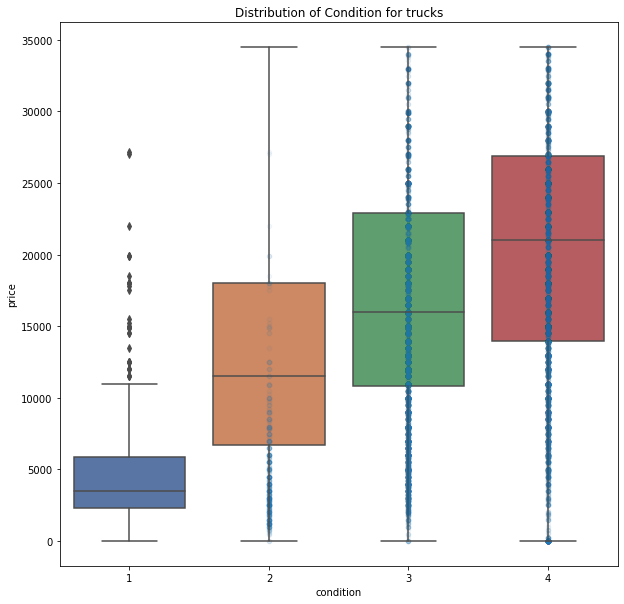

In [80]:
# Calculating price - condition correlation for trucks

data_filtered_truck.plot(
    x='condition', 
    y='price', 
    kind='scatter', 
    alpha=0.05, 
    figsize=(10,10), 
    title='Correlation between price and condition for trucks in the filtered dataset'
) 
print()
print(f'Correlation coefficient for price and condition for trucks in filtered dataframe:'
      f' {data_filtered_truck["price"].corr(data_filtered_truck["condition"]):.2%}')
print(f'Correlation coefficient for price and condition for trucks in original dataframe:'
      f' {data_truck["price"].corr(data_truck["condition"]):.2%}')

sns.set(rc={"figure.figsize":(12 , 10 )})
sns.boxplot(
    x=data_filtered_truck['condition'], 
    y=data_filtered_truck['price']).set(title="Distribution of Condition for trucks")

plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.



Correlation coefficient for price and condition for SUV in filtered dataframe: 27.46%
Correlation coefficient for price and condition for SUV in original dataframe: 27.12%


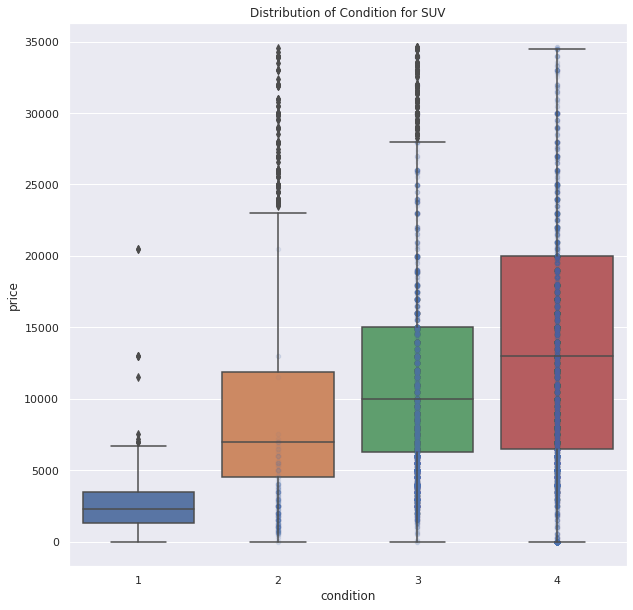

In [81]:
# Calculating price - condition correlation for SUV

data_filtered_SUV.plot(
    x='condition', 
    y='price', 
    kind='scatter', 
    alpha=0.05, 
    figsize=(10,10), 
    title='Correlation between price and condition for SUV in the filtered dataset'
) 
print()
print(f'Correlation coefficient for price and condition for SUV in filtered dataframe: '
      f'{data_filtered_SUV["price"].corr(data_filtered_SUV["condition"]):.2%}')
print(f'Correlation coefficient for price and condition for SUV in original dataframe: '
      f'{data_SUV["price"].corr(data_SUV["condition"]):.2%}')

sns.set(rc={"figure.figsize":(12 , 10 )})
sns.boxplot(
    x=data_filtered_SUV['condition'], 
    y=data_filtered_SUV['price']).set(title="Distribution of Condition for SUV")
plt.show()

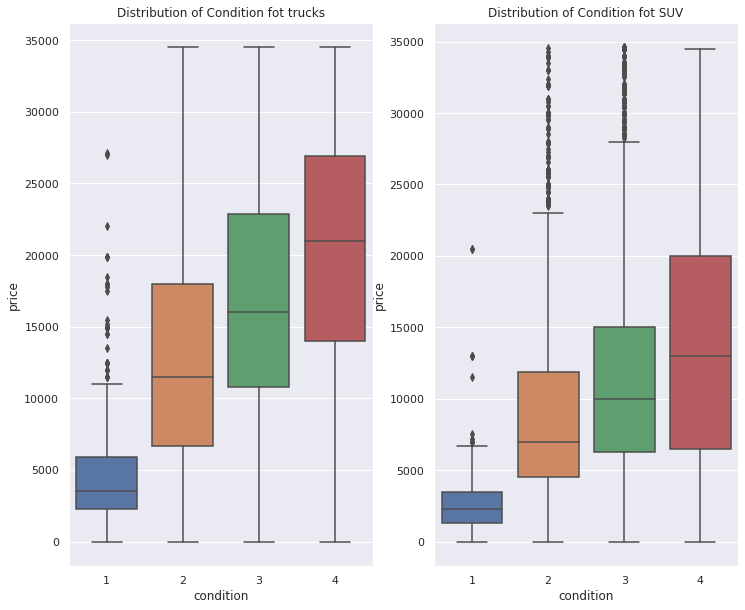

In [82]:
# Plotting the comparative graph for condition for trucks vs SUV

sns.set(rc={"figure.figsize":(12 , 10 )})
fig, axes = plt.subplots(1, 2)
sns.boxplot(
    x=data_filtered_truck['condition'], 
    y=data_filtered_truck['price'], 
    orient='v', 
    ax=axes[0]).set(title='Distribution of Condition fot trucks')
sns.boxplot(
    x=data_filtered_SUV['condition'], 
    y=data_filtered_SUV['price'], 
    orient='v', 
    ax=axes[1]).set(title='Distribution of Condition fot SUV')
plt.show()

One can see strong correlation beteween condition of the vehicle and it's price - the better condition the higher the price of the majority of the vehicles. There is difference between trucks and SUV catrgoris regarding "like new" and "excellent" condition - for SUV lower price level for both categories (Q1) is almost the same, while for all other categories the is clear deistinction: every following category has more higher Q1 level.  

### Price - transmisson type correlation

In [83]:
# Checking for number of ads for each category for trucks

print(data_filtered_truck['is_4wd'].value_counts())

1    11153
0     4053
Name: is_4wd, dtype: int64


All categories have more then 50 ads.

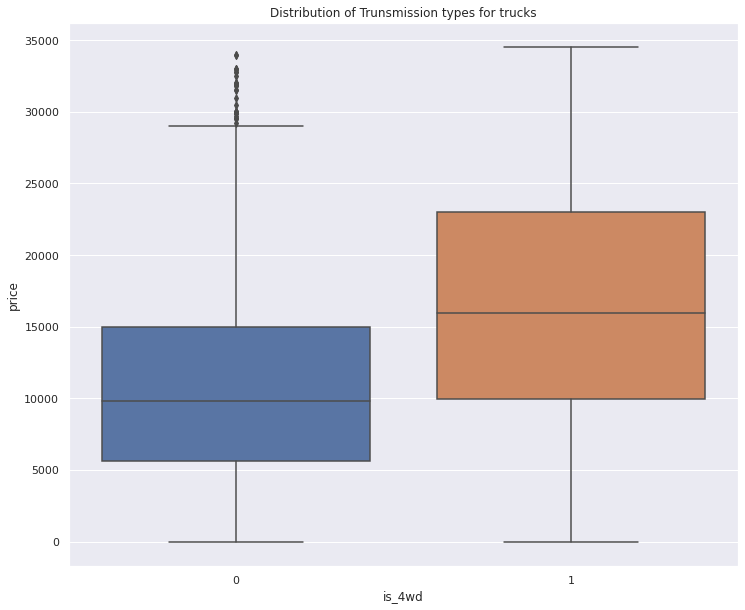

In [84]:
# Price - transmission correlation for truck

sns.set(rc={"figure.figsize":(12 , 10 )})
sns.boxplot(
    x=data_filtered_truck['is_4wd'], 
    y=data_filtered_truck['price']).set(title="Distribution of Trunsmission types for trucks")
plt.show()

The graph shows that regarding trucks automatic transmission affects the price, 75% of AWD vehicles have the prices higher, then 50% of 2WD ones. 

In [85]:
# Checking for number of ads for each category for SUV

print(data_filtered_SUV['is_4wd'].value_counts())

1    8898
0    3544
Name: is_4wd, dtype: int64


All categories have more then 50 ads.

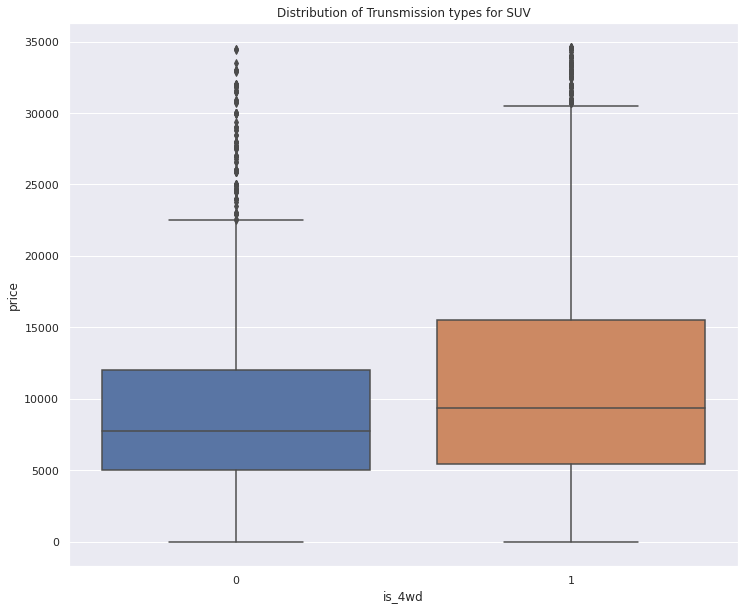

In [86]:
# Price - transmission correlation for SUV

sns.set(rc={"figure.figsize":(12 , 10 )})
sns.boxplot(
    x=data_filtered_SUV['is_4wd'], 
    y=data_filtered_SUV['price']).set(title="Distribution of Trunsmission types for SUV")
plt.show()

For SUV correletion of price and AWD transmission is less visibale.

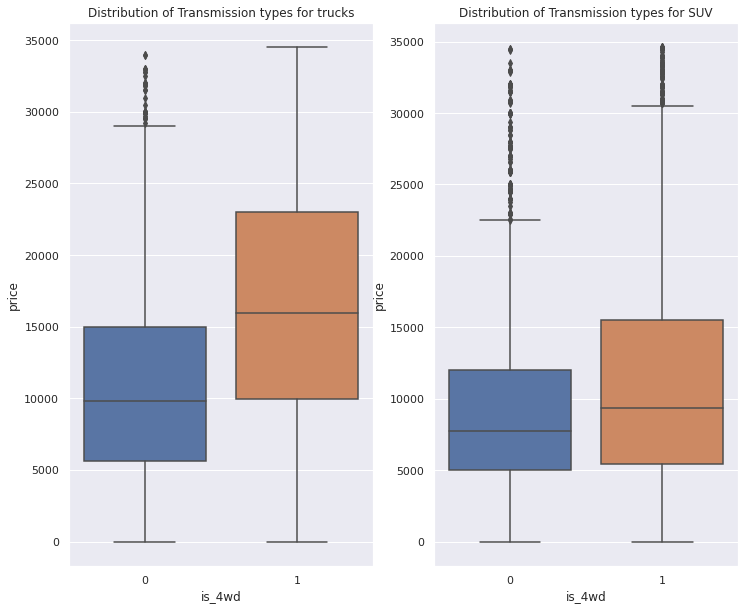

In [87]:
# Plotting the comparative graph for transmission type for trucks vs SUV

sns.set(rc={"figure.figsize":(12 , 10 )})
fig, axes = plt.subplots(1, 2)
sns.boxplot(
    x=data_filtered_truck['is_4wd'], 
    y=data_filtered_truck['price'], 
    orient='v', 
    ax=axes[0]).set(title='Distribution of Transmission types for trucks')
sns.boxplot(
    x=data_filtered_SUV['is_4wd'], 
    y=data_filtered_SUV['price'], 
    orient='v', 
    ax=axes[1]).set(title='Distribution of Transmission types for SUV')
plt.show()

The AWD transmission affects the price much more for trucks than for SUV. This may be due to the fact that for trucks, the presence of all-wheel drive transmission is much more important from a utility point of view than for SUV.

### Price - color correlation

In [88]:
# Checking for number of ads for each category for trucks

print(data_filtered_truck['color_unified'].value_counts())

white     4370
other     3824
black     1924
silver    1376
red       1327
grey      1227
blue      1158
Name: color_unified, dtype: int64


All categories have more then 50 ads.

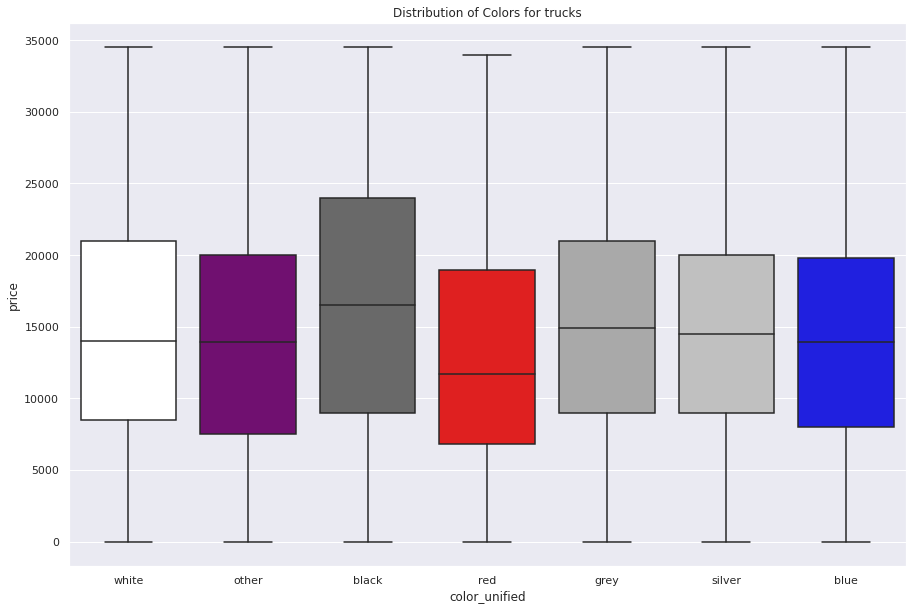

In [89]:
# Price - color correlation for trucks

fig, ax = plt.subplots(figsize=(15, 10))
colors_truck = ['white', 'purple', 'dimgrey', 'red', 'darkgrey', 'silver', 'blue']
sns.boxplot(
    y=data_filtered_truck['price'], 
    x=data_filtered_truck['color_unified'], 
    palette=colors_truck).set(title="Distribution of Colors for trucks")
plt.show()

Black, grey and white colors affect the price of trucks cars more then the others. Red color has the least effect.

In [90]:
# Checking for number of ads for each category for SUV

print(data_filtered_SUV['color_unified'].value_counts())

other     3528
black     2248
white     1873
silver    1628
grey      1207
blue      1019
red        939
Name: color_unified, dtype: int64


All categories have more then 50 ads.

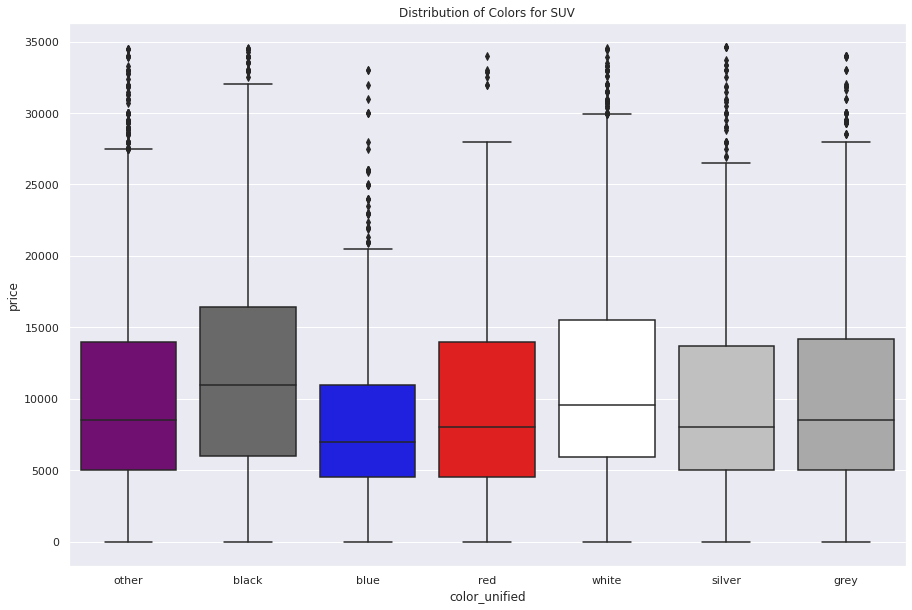

In [91]:
# Price - color correlation for SUV
fig, ax = plt.subplots(figsize=(15, 10))
colors_SUV = ['purple', 'dimgrey', 'blue', 'red', 'white', 'silver', 'darkgrey']
sns.boxplot(
    y=data_filtered_SUV['price'], 
    x=data_filtered_SUV['color_unified'], 
    palette=colors_SUV).set(title="Distribution of Colors for SUV")
plt.show()

Black and white colors affect the price of SUV cars more then the others. Blue color has the least effect.

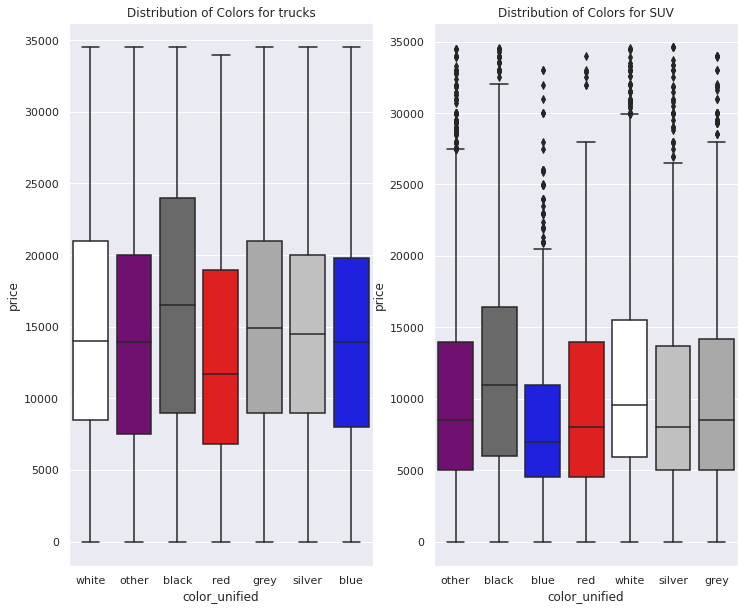

In [92]:
# Plotting the comparative graph for color for trucks vs SUV

sns.set(rc={"figure.figsize":(12 , 10 )})
fig, axes = plt.subplots(1, 2)
sns.boxplot(
    x=data_filtered_truck['color_unified'], 
    y=data_filtered_truck['price'], 
    orient='v', 
    palette=colors_truck, 
    ax=axes[0]).set(title='Distribution of Colors for trucks')
sns.boxplot(
    x=data_filtered_SUV['color_unified'], 
    y=data_filtered_SUV['price'], 
    orient='v', 
    palette=colors_SUV, 
    ax=axes[1]).set(title='Distribution of Colors for SUV')
plt.show()

Black and white colors are the main factors affecting the price for both categories of vehicles. For trucks the grey color is also the key factor (in oppisite to SUV).

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Correlation coefficient for odometer and car_age for trucks in the filtered dataset: 53.23%
Correlation coefficient for odometer and car_age for trucks in the original dataset: 49.457%


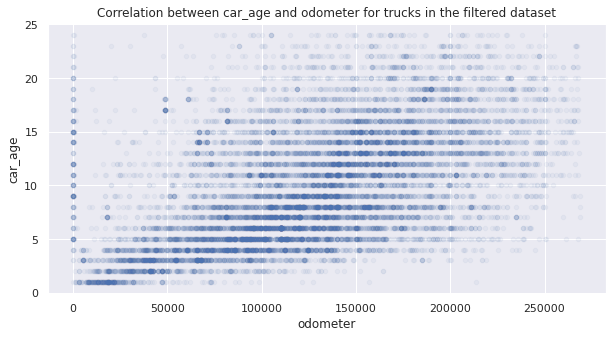

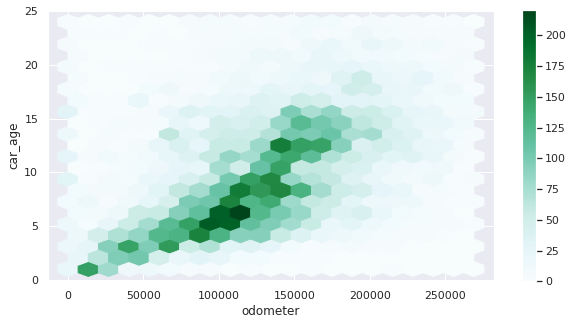

In [93]:
# Car_age -  odometer correlation for trucks

data_filtered_truck.plot(
    x='odometer', 
    y='car_age', 
    kind='scatter', 
    alpha=0.05, 
    figsize=(10,5), 
    title='Correlation between car_age and odometer for trucks in the filtered dataset'
) 
print(f'Correlation coefficient for odometer and car_age for trucks in the filtered dataset: '
      f'{data_filtered_truck["odometer"].corr(data_filtered_truck["car_age"]):.2%}')
print(f'Correlation coefficient for odometer and car_age for trucks in the original dataset: '
      f'{data_truck["odometer"].corr(data_truck["car_age"]):.3%}')

data_filtered_truck.plot(
    x='odometer', 
    y='car_age', 
    kind='hexbin', 
    gridsize=20, 
    figsize=(10, 5), 
    sharex=False, 
    grid=True
)
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Correlation coefficient for odometer and car_age for SUV in the filtered dataset: 61.17%
Correlation coefficient for odometer and car_age for SUV in the original dataset: 57.36%


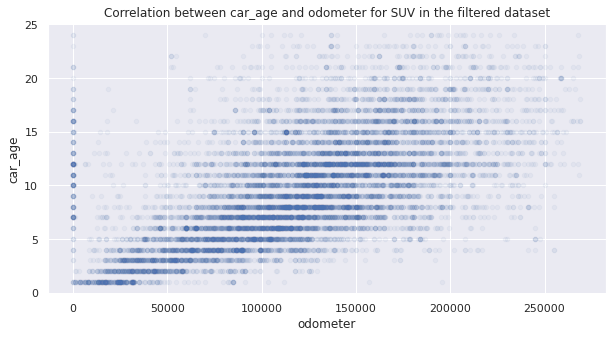

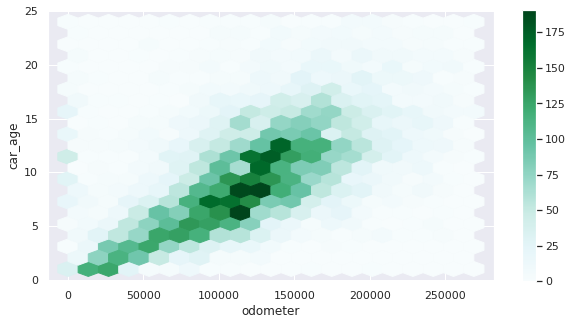

In [94]:
# Car_age -  odometer correlation for SUV

data_filtered_SUV.plot(
    x='odometer', 
    y='car_age', 
    kind='scatter', 
    alpha=0.05, 
    figsize=(10,5), 
    title='Correlation between car_age and odometer for SUV in the filtered dataset'
) 
print(f'Correlation coefficient for odometer and car_age for SUV in the filtered dataset: '
      f'{data_filtered_SUV["odometer"].corr(data_filtered_SUV["car_age"]):.2%}')
print(f'Correlation coefficient for odometer and car_age for SUV in the original dataset: '
      f'{data_SUV["odometer"].corr(data_SUV["car_age"]):.2%}')

data_filtered_SUV.plot(
    x='odometer', 
    y='car_age', 
    kind='hexbin', 
    gridsize=20, 
    figsize=(10, 5), 
    sharex=False, 
    grid=True
)
plt.show()

## General conclusion

[List your important conclusions in this final section, make sure they include those that led you to the way you processed and analyzed the data. Cover the missing values, duplicates, outliers and possible reasons and solutions for problematic artifacts that you had to address. Don't forget to remove all bracketed comments before submitting your project.]

We explored a pretty big dataframe of 51525 rows and 13 initial columns, containing information about ads for 100 models of all major car manufacturers. The original dataframe contained big amount of missing values (up to 18% in `color` column) in 4 columns (`model_year`, `cylinders`, `odometer` and `color`). Also we defined a like boolean type `is_4wd` column in which NAN valueus were likely equal to 0 (False) values.  
  
We did not get any information regarding 3 important price factors - accidents, warranty/warranty service and previous owners from the original dataset. We also did not get vehicle ids and thus did not have the possibility to define the returning ads.

We first explored all categorical values (`type`, `cylinders`, `condition`, `color`, `model` and `transmission` columns) for correct spelling and possible duplications caused by spelling. Values for `type`, `color` and `transmission` columns were correctly spelled without duplications, while values in `model` column showed some misspelling for the most populal Ford manufucterer models. After fixing spelling in `model` column there remained 97 model in the dataframe. 
In the `cylinders` column there were detected a small amount some uneven (3 & 5) values which were replaced to the 'other' value.  
  
Missing values in `model_year`, `color` and `cylinders` columns were filled by the most common values in the dataset for the respective models. Missing values in `odometer` column were filled by median values for respective model and model_year. For the one and only Mercedes vehicle ("mercedes-benz benze sprinter 250") the `odometer` was set to since we have no models to compare with. to After checking the distribution of NAN values in `is_4wd` column this values were filled with 0 levels (for non AWD vehicles).  
  
No duplicate entries in the dataframe were found after fixing missing values.  
  
After channging the format of the `date_posted` data to datetime format we calculated the age of each vehicle at the date the ad was posted (values stored in `car_age` column) since the age of the vehicle is one of the major factors affecting the price. The average milage per year also was calculated but without information for vehicles warranty it is less informative for buyers then total milage.  

At this step distribution of `type` values were explored more precisely. It was found out, that `type` column had a lot of impossible data, when the small car like "ford fusion se" had the "truck" type and classic truck "ford f-250" had a "coupe" type. The most common mix of types was found with "trucks" and "pickups". Regarding the most popular model in the dataset "ford f-150" (as well as "ford f-250/350") and taking into considaration its dataframe share of 12/1% we appplied only one type which was defined as "truck". The similar approach was applied to other models.  
  
Distribution of values in `condition` also raised many questions. "New" cars turned out to have milage up to 315000, while cars from other categories ("like new", "excellent" and even "salvage") had 0 or about 0 milage which seems to be impossible values.   
  
The outliers for core parameters: `price`, `car_age`, `odometer`, number of cylinders, `days_listed` and `condition` were explored and treated respectively. Regarding `condition` column outliers were first explored outliers for each category and then for the whole column.  
  
After treating the outlies the size of the original dataframe reduced by 11.1% to 45798 rows.  
  
The most popular vehicle types finally were found as truck (33%), and SUV (27%). For this most common types we explored the correlation between `price` and other core parameters such as: `condition`, `cylinders`, `odometer` and `car_age`.

The study shows the following results:  
**truck:**
- average correlation between price and milage - 49.1% (46.1% in the original  dataset)  
- much more strong correlation between price and car age - 63.2% (54.9% in the original  dataset)  
- weak correlation between price and condition of a car - 34.5% (34.8% in the original  dataset)  

**SUV:**
- average correlation between price and milage - 55.2% (52.4% in the original  dataset)  
- more strong correlation between price and car age - 58.8% (51.9% in the original  dataset)  
- weak correlation between price and condition of a car - 27.5% (27.1.8% in the original  dataset)
  
  
For trucks the correlation between price and car age (63.2%) is stronger then for SUV (58.8%). while regarding milage the correlation is stronger for SUV (55.2%) then for trucks 49.1%. Condition has weak correlation for both types. 

As a final conclusion we can say, that in our dataset the most strong correlation was found between price and the age of the car for trucks - 63.2%, while maximum correlation between price and milage (a bit less strong) - 55.2% for SUV.  
Two colors for both types much more affecting the price are black and white. AWD also affects the price and for trucks this influence is much stronger, than for SUV. 